### P11 Préparation et Nettoyage

In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [3]:
sns.set()

# 1.1 fichier stabilité politique


In [5]:
df_stabilite = pd.read_excel("stabilitepolitique.xlsx")
df_stabilite.head()

codeindyr code     countryname  year indicator  estimate    stddev nsource  \
0  AFGcc1996  AFG     Afghanistan  1996        cc -1.291705  0.340507       2   
1  ALBcc1996  ALB         Albania  1996        cc -0.893903  0.315914       3   
2  DZAcc1996  DZA         Algeria  1996        cc -0.566741  0.262077       4   
3  ASMcc1996  ASM  American Samoa  1996        cc        ..        ..      ..   
4  ADOcc1996  ADO         Andorra  1996        cc  1.318143  0.480889       1   

     pctrank pctranklower pctrankupper  
0   4.301075            0    27.419355  
1  19.354839     2.688172    43.010754  
2  33.333332    16.666666    52.688171  
3         ..           ..           ..  
4  87.096771    72.043015    96.774193

In [6]:
df_stabilite = df_stabilite[(df_stabilite["year"]==2017) & (df_stabilite["indicator"]== "pv")]
df_stabilite.head()

codeindyr code     countryname  year indicator  estimate    stddev  \
23540  AFGpv2017  AFG     Afghanistan  2017        pv -2.794976  0.225672   
23541  ALBpv2017  ALB         Albania  2017        pv  0.373771  0.213936   
23542  DZApv2017  DZA         Algeria  2017        pv -0.919614  0.219212   
23543  ASMpv2017  ASM  American Samoa  2017        pv  1.184324  0.344771   
23544  ADOpv2017  ADO         Andorra  2017        pv   1.39289  0.309248   

      nsource    pctrank pctranklower pctrankupper  
23540       6    0.47619            0     1.428571  
23541       8  59.523811    46.666668    70.476189  
23542       7  15.714286     9.523809    27.142857  
23543       1  91.904762    66.666664    99.523811  
23544       2   97.14286    77.619049    99.523811

In [7]:
df_stabilite =df_stabilite.rename(columns={"estimate":"stabilite_politique"})
df_stabilite.info()


<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 23540 to 23753
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codeindyr            214 non-null    object
 1   code                 214 non-null    object
 2   countryname          214 non-null    object
 3   year                 214 non-null    int64 
 4   indicator            214 non-null    object
 5   stabilite_politique  214 non-null    object
 6   stddev               214 non-null    object
 7   nsource              214 non-null    object
 8   pctrank              214 non-null    object
 9   pctranklower         214 non-null    object
 10  pctrankupper         214 non-null    object
dtypes: int64(1), object(10)
memory usage: 20.1+ KB


In [8]:
df_stabilite = df_stabilite[["countryname","stabilite_politique"]]
df_stabilite =df_stabilite.rename(columns={"countryname":"Country Name"})
df_stabilite.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 23540 to 23753
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country Name         214 non-null    object
 1   stabilite_politique  214 non-null    object
dtypes: object(2)
memory usage: 5.0+ KB


# 1.2 Pib par habitant

In [10]:
df_pibhab= pd.read_excel("pibhabitant.xlsx")
df_pibhab.head()


Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  GDP per capita (current US$)   
1  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3   Africa Western and Central          AFW  GDP per capita (current US$)   
4                       Angola          AGO  GDP per capita (current US$)   

   Indicator Code        1960        1961        1962        1963        1964  \
0  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
1  NY.GDP.PCAP.CD  186.132432  186.947182  197.408105  225.447007  209.005786   
2  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   
3  NY.GDP.PCAP.CD  121.938353  127.452629  133.825452  139.006714  148.547736   
4  NY.GDP.PCAP.CD         NaN         NaN         NaN         NaN         NaN   

         1965  ...          2015          2016          2017          2018  \
0         NaN  ...  27458.225331  27441.529662  28440.051964  30082.127645   
1  226.883067  ...   1479.564123   1329.777824   1520.171298   1538.924188   
2         NaN  ...    565.569730    522.082216    525.469771    491.337221   
3  155.563837  ...   1845.767804   1616.843198   1560.162999   1703.896392   
4         NaN  ...   3213.902611   1807.952941   2437.259712   2538.591391   

           2019          2020          2021          2022          2023  2024  
0  31096.205074  22855.932320  27200.061079  30559.533535  33984.790620   NaN  
1   1493.780445   1344.080962   1522.590088   1628.024526   1659.515290   NaN  
2    496.602504    510.787063    356.496214    357.261153    415.707417   NaN  
3   1783.654365   1664.249176   1747.840549   1777.235012   1568.724310   NaN  
4   2189.855714   1449.922867   1925.874661   2929.694455   2308.159767   NaN  

[5 rows x 69 columns]

In [11]:
df_pibhab = df_pibhab[["Country Name","Indicator Name","2017"]]
df_pibhab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            258 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [12]:
df_pibhab =df_pibhab.rename(columns={"2017":"GDP per capita (current US$)"}).drop("Indicator Name",axis=1)
df_pibhab.head()

Country Name  GDP per capita (current US$)
0                        Aruba                  28440.051964
1  Africa Eastern and Southern                   1520.171298
2                  Afghanistan                    525.469771
3   Africa Western and Central                   1560.162999
4                       Angola                   2437.259712

# 1.3 Croissance pib

In [14]:
df_croissancepib= pd.read_excel("croissancepib.xlsx")
df_croissancepib.head()


Country Name Country Code         Indicator Name  \
0                        Aruba          ABW  GDP growth (annual %)   
1  Africa Eastern and Southern          AFE  GDP growth (annual %)   
2                  Afghanistan          AFG  GDP growth (annual %)   
3   Africa Western and Central          AFW  GDP growth (annual %)   
4                       Angola          AGO  GDP growth (annual %)   

      Indicator Code  1960      1961      1962      1963      1964      1965  \
0  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
1  NY.GDP.MKTP.KD.ZG   NaN  0.468736  7.869709  5.622374  4.690458  5.159574   
2  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   
3  NY.GDP.MKTP.KD.ZG   NaN  1.873054  3.712777  7.111968  5.413943  4.120855   
4  NY.GDP.MKTP.KD.ZG   NaN       NaN       NaN       NaN       NaN       NaN   

   ...      2015      2016      2017      2018      2019       2020  \
0  ... -0.623626  1.719625  7.048533  2.397085 -2.232440 -26.211821   
1  ...  3.004937  2.194761  2.684543  2.666632  2.194319  -2.864293   
2  ...  1.451315  2.260314  2.647003  1.189228  3.911603  -2.351101   
3  ...  2.720365  0.160782  2.289810  2.844755  3.232903  -1.003994   
4  ...  0.943572 -2.580050 -0.147213 -1.316362 -0.702273  -5.638215   

        2021      2022      2023  2024  
0  24.132627  8.517918  4.263719   NaN  
1   4.576393  3.553878  2.320138   NaN  
2 -20.738839 -6.240172  2.710887   NaN  
3   4.037630  3.789680  3.354733   NaN  
4   1.199211  3.044727  1.001289   NaN  

[5 rows x 69 columns]

In [15]:
df_croissancepib = df_croissancepib[["Country Name","Indicator Name","2017"]]
df_croissancepib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            257 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [16]:
df_croissancepib =df_croissancepib.rename(columns={"2017":"GDP growth (annual %)"}).drop("Indicator Name",axis=1)
df_croissancepib.head()

Country Name  GDP growth (annual %)
0                        Aruba               7.048533
1  Africa Eastern and Southern               2.684543
2                  Afghanistan               2.647003
3   Africa Western and Central               2.289810
4                       Angola              -0.147213

# 1.4 Pouvoir d'achat

In [18]:
df_pouvoirachat= pd.read_excel("pouvoirachat.xlsx")
df_pouvoirachat.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                               Indicator Name  Indicator Code  1960  1961  \
0  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
1  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
2  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
3  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   
4  GNI per capita, Atlas method (current US$)  NY.GNP.PCAP.CD   NaN   NaN   

         1962        1963        1964        1965  ...          2015  \
0         NaN         NaN         NaN         NaN  ...  24460.000000   
1  189.385293  202.994308  204.818607  217.184561  ...   1520.193335   
2         NaN         NaN         NaN         NaN  ...    590.000000   
3         NaN         NaN         NaN         NaN  ...   1972.431208   
4         NaN         NaN         NaN         NaN  ...   3920.000000   

           2016          2017          2018          2019          2020  \
0  25270.000000  27110.000000  28130.000000  28720.000000  22220.000000   
1   1388.377418   1360.729674   1426.994115   1489.693436   1381.202876   
2    560.000000    530.000000    520.000000    520.000000    490.000000   
3   1750.339272   1570.400788   1598.675892   1671.338955   1674.520056   
4   2540.000000   2090.000000   1970.000000   2110.000000   1680.000000   

           2021          2022          2023  2024  
0  28020.000000  30590.000000  30120.000000   NaN  
1   1451.609900   1534.027144   1579.924932   NaN  
2    380.000000    370.000000    380.000000   NaN  
3   1729.821959   1771.570654   1680.838434   NaN  
4   1640.000000   1870.000000   2120.000000   NaN  

[5 rows x 69 columns]

In [19]:
df_pouvoirachat = df_pouvoirachat[["Country Name","Indicator Name","2017"]]
df_pouvoirachat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            247 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [20]:
df_pouvoirachat =df_pouvoirachat.rename(columns={"2017":"GNI per capita, Atlas method (current US$"}).drop("Indicator Name",axis=1)
df_pouvoirachat.head()

Country Name  GNI per capita, Atlas method (current US$
0                        Aruba                               27110.000000
1  Africa Eastern and Southern                                1360.729674
2                  Afghanistan                                 530.000000
3   Africa Western and Central                                1570.400788
4                       Angola                                2090.000000

# 1.5 part population urbaine

In [22]:
df_partpopurb= pd.read_excel("partpopurb.xlsx")
df_partpopurb.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                             Indicator Name     Indicator Code       1960  \
0  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  50.776000   
1  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.576676   
2  Urban population (% of total population)  SP.URB.TOTL.IN.ZS   8.401000   
3  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  14.710006   
4  Urban population (% of total population)  SP.URB.TOTL.IN.ZS  10.435000   

        1961       1962       1963       1964       1965  ...       2015  \
0  50.761000  50.746000  50.730000  50.715000  50.700000  ...  43.108000   
1  14.825175  15.083802  15.363045  15.655383  15.955912  ...  34.447281   
2   8.684000   8.976000   9.276000   9.586000   9.904000  ...  24.803000   
3  15.094445  15.487932  15.900682  16.331319  16.779793  ...  44.849099   
4  10.798000  11.204000  11.624000  12.058000  12.504000  ...  63.446000   

        2016       2017       2018       2019       2020       2021  \
0  43.192000  43.293000  43.411000  43.546000  43.697000  43.866000   
1  34.919544  35.396289  35.893398  36.384272  36.884034  37.393633   
2  25.020000  25.250000  25.495000  25.754000  26.026000  26.314000   
3  45.473850  46.094137  46.709753  47.322617  47.931021  48.531971   
4  64.149000  64.839000  65.514000  66.177000  66.825000  67.460000   

        2022       2023  2024  
0  44.052000  44.254000   NaN  
1  37.909012  38.424898   NaN  
2  26.616000  26.933000   NaN  
3  49.129808  49.711184   NaN  
4  68.081000  68.688000   NaN  

[5 rows x 69 columns]

In [23]:
df_partpopurb = df_partpopurb[["Country Name","Indicator Name","2017"]]
df_partpopurb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            263 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [24]:
df_partpopurb =df_partpopurb.rename(columns={"2017":"Urban population (% of total population)"}).drop("Indicator Name",axis=1)
df_partpopurb.head()

Country Name  Urban population (% of total population)
0                        Aruba                                 43.293000
1  Africa Eastern and Southern                                 35.396289
2                  Afghanistan                                 25.250000
3   Africa Western and Central                                 46.094137
4                       Angola                                 64.839000

# 1.6 accèes electricité

In [26]:
df_acceselec= pd.read_excel("acceselec.xlsx")
df_acceselec.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                            Indicator Name  Indicator Code  1960  1961  1962  \
0  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
1  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
2  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
3  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   
4  Access to electricity (% of population)  EG.ELC.ACCS.ZS   NaN   NaN   NaN   

   1963  1964  1965  ...        2015        2016        2017        2018  \
0   NaN   NaN   NaN  ...  100.000000  100.000000  100.000000  100.000000   
1   NaN   NaN   NaN  ...   33.922276   38.859598   40.223744   43.035073   
2   NaN   NaN   NaN  ...   71.500000   97.700000   97.700000   93.400000   
3   NaN   NaN   NaN  ...   46.862418   51.045127   48.900728   51.335829   
4   NaN   NaN   NaN  ...   42.000000   41.800000   42.900000   45.300000   

         2019        2020        2021       2022        2023  2024  
0  100.000000  100.000000  100.000000  99.900000  100.000000   NaN  
1   44.390861   46.282371   48.127211  48.801258   50.668330   NaN  
2   97.700000   97.700000   97.700000  85.300000   85.300000   NaN  
3   51.291577   51.856043   54.368599  55.686683   57.069267   NaN  
4   45.600000   47.000000   48.200000  48.500000   51.100000   NaN  

[5 rows x 69 columns]

In [27]:
df_acceselec = df_acceselec[["Country Name","Indicator Name","2017"]]
df_acceselec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            263 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [28]:
df_acceselec =df_acceselec.rename(columns={"2017":"Access to electricity (% of population)"}).drop("Indicator Name",axis=1)
df_acceselec.head()

Country Name  Access to electricity (% of population)
0                        Aruba                               100.000000
1  Africa Eastern and Southern                                40.223744
2                  Afghanistan                                97.700000
3   Africa Western and Central                                48.900728
4                       Angola                                42.900000

# 1.7 acces internet

In [30]:
df_accesinternet= pd.read_excel("accesinternet.xlsx")
df_accesinternet.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                                     Indicator Name  Indicator Code  1960  \
0  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
1  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
2  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
3  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   
4  Individuals using the Internet (% of population)  IT.NET.USER.ZS   NaN   

   1961  1962  1963  1964  1965  ...   2015  2016  2017  2018  2019  2020  \
0   NaN   NaN   NaN   NaN   NaN  ...  88.70  93.5  97.2   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   8.26  11.0  13.5  16.8  17.6  17.0   
3   NaN   NaN   NaN   NaN   NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...  22.00  23.2  26.0  29.0  32.1  36.6   

   2021  2022  2023  2024  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2  16.5  17.2  17.7   NaN  
3   NaN   NaN   NaN   NaN  
4  39.4  42.1  44.8   NaN  

[5 rows x 69 columns]

In [31]:
df_accesinternet = df_accesinternet[["Country Name","Indicator Name","2017"]]
df_accesinternet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            210 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [32]:
df_accesinternet =df_accesinternet.rename(columns={"2017":"Individuals using the Internet (% of population)"}).drop("Indicator Name",axis=1)
df_accesinternet.head()

Country Name  \
0                        Aruba   
1  Africa Eastern and Southern   
2                  Afghanistan   
3   Africa Western and Central   
4                       Angola   

   Individuals using the Internet (% of population)  
0                                              97.2  
1                                               NaN  
2                                              13.5  
3                                               NaN  
4                                              26.0

# 1.8 jointure fichier banque mondial

In [34]:
df_merged_BM = df_pibhab
df_merged_BM = df_merged_BM.merge(df_croissancepib, on="Country Name",how="inner")
df_merged_BM = df_merged_BM.merge(df_pouvoirachat, on="Country Name",how="inner")
df_merged_BM = df_merged_BM.merge(df_partpopurb, on="Country Name",how="inner")
df_merged_BM = df_merged_BM.merge(df_acceselec, on="Country Name",how="inner")
df_merged_BM = df_merged_BM.merge(df_accesinternet, on="Country Name",how="inner")
df_merged_BM

Country Name  GDP per capita (current US$)  \
0                          Aruba                  28440.051964   
1    Africa Eastern and Southern                   1520.171298   
2                    Afghanistan                    525.469771   
3     Africa Western and Central                   1560.162999   
4                         Angola                   2437.259712   
..                           ...                           ...   
261                       Kosovo                   4009.317993   
262                  Yemen, Rep.                    811.165964   
263                 South Africa                   6618.335083   
264                       Zambia                   1483.465773   
265                     Zimbabwe                   3448.082537   

     GDP growth (annual %)  GNI per capita, Atlas method (current US$  \
0                 7.048533                               27110.000000   
1                 2.684543                                1360.729674   
2                 2.647003                                 530.000000   
3                 2.289810                                1570.400788   
4                -0.147213                                2090.000000   
..                     ...                                        ...   
261               4.825656                                3950.000000   
262              -5.071796                                 880.000000   
263               1.157947                                5850.000000   
264               3.525863                                1260.000000   
265               4.080264                                1670.000000   

     Urban population (% of total population)  \
0                                   43.293000   
1                                   35.396289   
2                                   25.250000   
3                                   46.094137   
4                                   64.839000   
..                                        ...   
261                                       NaN   
262                                 36.016000   
263                                 65.850000   
264                                 42.976000   
265                                 32.237000   

     Access to electricity (% of population)  \
0                                 100.000000   
1                                  40.223744   
2                                  97.700000   
3                                  48.900728   
4                                  42.900000   
..                                       ...   
261                                      NaN   
262                                79.200000   
263                                84.400000   
264                                40.300000   
265                                44.000000   

     Individuals using the Internet (% of population)  
0                                                97.2  
1                                                 NaN  
2                                                13.5  
3                                                 NaN  
4                                                26.0  
..                                                ...  
261                                              83.9  
262                                              26.7  
263                                              56.2  
264                                              12.2  
265                                              24.4  

[266 rows x 7 columns]

In [35]:
df_merged_BM.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      266 non-null    object 
 1   GDP per capita (current US$)                      258 non-null    float64
 2   GDP growth (annual %)                             257 non-null    float64
 3   GNI per capita, Atlas method (current US$         247 non-null    float64
 4   Urban population (% of total population)          263 non-null    float64
 5   Access to electricity (% of population)           263 non-null    float64
 6   Individuals using the Internet (% of population)  210 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.7+ KB


# 1.9 population


In [37]:
df_population = pd.read_csv("population.csv")
df_population.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [38]:
df_population = df_population[(df_population["Année"]==2017)]
df_population.head()

Code Domaine                       Domaine  Code zone            Zone  \
17           OA  Séries temporelles annuelles          2     Afghanistan   
36           OA  Séries temporelles annuelles        202  Afrique du Sud   
55           OA  Séries temporelles annuelles          3         Albanie   
74           OA  Séries temporelles annuelles          4         Algérie   
93           OA  Séries temporelles annuelles         79       Allemagne   

    Code Élément            Élément  Code Produit                 Produit  \
17           511  Population totale          3010  Population-Estimations   
36           511  Population totale          3010  Population-Estimations   
55           511  Population totale          3010  Population-Estimations   
74           511  Population totale          3010  Population-Estimations   
93           511  Population totale          3010  Population-Estimations   

    Code année  Année           Unité     Valeur Symbole  \
17        2017   2017  1000 personnes  36296.113       X   
36        2017   2017  1000 personnes  57009.756       X   
55        2017   2017  1000 personnes   2884.169       X   
74        2017   2017  1000 personnes  41389.189       X   
93        2017   2017  1000 personnes  82658.409       X   

           Description du Symbole Note  
17  Sources internationales sûres  NaN  
36  Sources internationales sûres  NaN  
55  Sources internationales sûres  NaN  
74  Sources internationales sûres  NaN  
93  Sources internationales sûres  NaN

In [39]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 17 to 4409
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            236 non-null    object 
 1   Domaine                 236 non-null    object 
 2   Code zone               236 non-null    int64  
 3   Zone                    236 non-null    object 
 4   Code Élément            236 non-null    int64  
 5   Élément                 236 non-null    object 
 6   Code Produit            236 non-null    int64  
 7   Produit                 236 non-null    object 
 8   Code année              236 non-null    int64  
 9   Année                   236 non-null    int64  
 10  Unité                   236 non-null    object 
 11  Valeur                  236 non-null    float64
 12  Symbole                 236 non-null    object 
 13  Description du Symbole  236 non-null    object 
 14  Note                    1 non-null      objec

In [40]:
df_population = df_population[["Zone","Valeur"]]
df_population = df_population.rename(columns={"Zone":"Country Name","Valeur":"Populationx1000"})
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     236 non-null    object 
 1   Populationx1000  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


# 1.9.1 jointure banque mondial et population

In [42]:
df_merged_BM_erreur = df_population.merge(df_merged_BM, on="Country Name",how="inner")
df_merged_BM_erreur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      62 non-null     object 
 1   Populationx1000                                   62 non-null     float64
 2   GDP per capita (current US$)                      61 non-null     float64
 3   GDP growth (annual %)                             60 non-null     float64
 4   GNI per capita, Atlas method (current US$         58 non-null     float64
 5   Urban population (% of total population)          62 non-null     float64
 6   Access to electricity (% of population)           62 non-null     float64
 7   Individuals using the Internet (% of population)  61 non-null     float64
dtypes: float64(7), object(1)
memory usage: 4.0+ KB


#### attention probleme jointure entre anglais et francais

# 1.9.2 Population en anglais

In [45]:
df_populationeng= pd.read_excel("populationeng.xlsx")
df_populationeng.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2015         2016         2017         2018  \
0      58190.0  ...     107906.0     108727.0     108735.0     108908.0   
1  149033472.0  ...  607123269.0  623369401.0  640058741.0  657801085.0   
2   10036008.0  ...   33831764.0   34700612.0   35688935.0   36743039.0   
3  108772632.0  ...  418127845.0  429454743.0  440882906.0  452195915.0   
4    5521981.0  ...   28157798.0   29183070.0   30234839.0   31297155.0   

          2019         2020         2021         2022         2023  2024  
0     109203.0     108587.0     107700.0     107310.0     107359.0   NaN  
1  675950189.0  694446100.0  713090928.0  731821393.0  750503764.0   NaN  
2   37856121.0   39068979.0   40000412.0   40578842.0   41454761.0   NaN  
3  463365429.0  474569351.0  485920997.0  497387180.0  509398589.0   NaN  
4   32375632.0   33451132.0   34532429.0   35635029.0   36749906.0   NaN  

[5 rows x 69 columns]

In [46]:
df_populationeng = df_populationeng[["Country Name","Indicator Name","2017"]]
df_populationeng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Indicator Name  266 non-null    object 
 2   2017            265 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [47]:
df_populationeng =df_populationeng.rename(columns={"2017":"population"}).drop("Indicator Name",axis=1)
df_populationeng.head()

Country Name   population
0                        Aruba     108735.0
1  Africa Eastern and Southern  640058741.0
2                  Afghanistan   35688935.0
3   Africa Western and Central  440882906.0
4                       Angola   30234839.0

# 1.9.3 joiture population et donnée banque mondiale

In [49]:
df_merged_BM = df_merged_BM.merge(df_populationeng, on="Country Name",how="inner")
df_merged_BM

Country Name  GDP per capita (current US$)  \
0                          Aruba                  28440.051964   
1    Africa Eastern and Southern                   1520.171298   
2                    Afghanistan                    525.469771   
3     Africa Western and Central                   1560.162999   
4                         Angola                   2437.259712   
..                           ...                           ...   
261                       Kosovo                   4009.317993   
262                  Yemen, Rep.                    811.165964   
263                 South Africa                   6618.335083   
264                       Zambia                   1483.465773   
265                     Zimbabwe                   3448.082537   

     GDP growth (annual %)  GNI per capita, Atlas method (current US$  \
0                 7.048533                               27110.000000   
1                 2.684543                                1360.729674   
2                 2.647003                                 530.000000   
3                 2.289810                                1570.400788   
4                -0.147213                                2090.000000   
..                     ...                                        ...   
261               4.825656                                3950.000000   
262              -5.071796                                 880.000000   
263               1.157947                                5850.000000   
264               3.525863                                1260.000000   
265               4.080264                                1670.000000   

     Urban population (% of total population)  \
0                                   43.293000   
1                                   35.396289   
2                                   25.250000   
3                                   46.094137   
4                                   64.839000   
..                                        ...   
261                                       NaN   
262                                 36.016000   
263                                 65.850000   
264                                 42.976000   
265                                 32.237000   

     Access to electricity (% of population)  \
0                                 100.000000   
1                                  40.223744   
2                                  97.700000   
3                                  48.900728   
4                                  42.900000   
..                                       ...   
261                                      NaN   
262                                79.200000   
263                                84.400000   
264                                40.300000   
265                                44.000000   

     Individuals using the Internet (% of population)   population  
0                                                97.2     108735.0  
1                                                 NaN  640058741.0  
2                                                13.5   35688935.0  
3                                                 NaN  440882906.0  
4                                                26.0   30234839.0  
..                                                ...          ...  
261                                              83.9    1791019.0  
262                                              26.7   33090921.0  
263                                              56.2   57635162.0  
264                                              12.2   17441320.0  
265                                              24.4   14812482.0  

[266 rows x 8 columns]

# 1.10 Fao stat poulet et viande

In [51]:
df_faopoulet = pd.read_csv("faostatpoulet.csv")
df_faopoulet.head()

Domain Code                 Domain  Area Code (M49)         Area  \
0         FBS  Food Balances (2010-)                4  Afghanistan   
1         FBS  Food Balances (2010-)                4  Afghanistan   
2         FBS  Food Balances (2010-)                4  Afghanistan   
3         FBS  Food Balances (2010-)                4  Afghanistan   
4         FBS  Food Balances (2010-)                4  Afghanistan   

   Element Code          Element Item Code (FBS)          Item  Year Code  \
0          5511       Production           S2943          Meat       2017   
1          5611  Import quantity           S2943          Meat       2017   
2          5911  Export quantity           S2943          Meat       2017   
3          5142             Food           S2943          Meat       2017   
4          5511       Production           S2734  Poultry Meat       2017   

   Year    Unit  Value Flag Flag Description  Note  
0  2017  1000 t    293    E  Estimated value   NaN  
1  2017  1000 t     39    E  Estimated value   NaN  
2  2017  1000 t      0    E  Estimated value   NaN  
3  2017  1000 t    339    E  Estimated value   NaN  
4  2017  1000 t     28    I    Imputed value   NaN

In [52]:
df_faopoulet = df_faopoulet[["Area","Element","Item","Value"]]
df_faopoulet =df_faopoulet.rename(columns={"Value":"Value(en 1000T)","Area":"Country Name"})
df_faopoulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     1389 non-null   object
 1   Element          1389 non-null   object
 2   Item             1389 non-null   object
 3   Value(en 1000T)  1389 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 43.5+ KB


In [53]:
df_faopoulet_pivot = df_faopoulet.pivot_table(
    index="Country Name",
    columns=["Element", "Item"],
    values="Value(en 1000T)",
    aggfunc="sum")

df_faopoulet_pivot.columns = [f"{el}_{it}" for el, it in df_faopoulet_pivot.columns]
df_faopoulet_pivot = df_faopoulet_pivot.reset_index()

In [54]:
df_faopoulet_pivot

Country Name  Export quantity_Meat  \
0                           Afghanistan                   0.0   
1                               Albania                   0.0   
2                               Algeria                   1.0   
3                                Angola                   0.0   
4                   Antigua and Barbuda                   0.0   
..                                  ...                   ...   
176  Venezuela (Bolivarian Republic of)                   0.0   
177                            Viet Nam                  30.0   
178                               Yemen                   0.0   
179                              Zambia                   1.0   
180                            Zimbabwe                   0.0   

     Export quantity_Poultry Meat  Food_Meat  Food_Poultry Meat  \
0                             NaN      339.0               64.0   
1                             0.0      124.0               33.0   
2                             0.0      837.0              286.0   
3                             0.0      743.0              318.0   
4                             0.0        8.0                6.0   
..                            ...        ...                ...   
176                           NaN     1067.0              486.0   
177                           8.0     3973.0              928.0   
178                           0.0      436.0              253.0   
179                           1.0      341.0               60.0   
180                           NaN      762.0               75.0   

     Import quantity_Meat  Import quantity_Poultry Meat  Production_Meat  \
0                    39.0                          29.0            293.0   
1                    34.0                          20.0             90.0   
2                    68.0                           2.0            809.0   
3                   451.0                         277.0            294.0   
4                    11.0                           7.0              0.0   
..                    ...                           ...              ...   
176                  53.0                          23.0           1040.0   
177                 114.0                          62.0           3884.0   
178                  82.0                          82.0            354.0   
179                  13.0                          12.0            338.0   
180                   7.0                           6.0            754.0   

     Production_Poultry Meat  
0                       28.0  
1                       13.0  
2                      284.0  
3                       40.0  
4                        0.0  
..                       ...  
176                    462.0  
177                    874.0  
178                    171.0  
179                     49.0  
180                     69.0  

[181 rows x 9 columns]

In [55]:
df_faopoulet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  181 non-null    object 
 1   Export quantity_Meat          165 non-null    float64
 2   Export quantity_Poultry Meat  141 non-null    float64
 3   Food_Meat                     181 non-null    float64
 4   Food_Poultry Meat             181 non-null    float64
 5   Import quantity_Meat          181 non-null    float64
 6   Import quantity_Poultry Meat  180 non-null    float64
 7   Production_Meat               181 non-null    float64
 8   Production_Poultry Meat       179 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.9+ KB


# 1.11 Surface agricole bio

In [57]:
df_surfaceagribio= pd.read_excel("surfaceagribio.xlsx")
df_surfaceagribio.head()

Country  Year  Organic area share of total farmland [%]
0  Afghanistan  2017                                      0.00
1      Albania  2017                                      0.05
2      Algeria  2017                                      0.00
3      Andorra  2017                                      0.01
4    Argentina  2017                                      3.04

In [58]:
df_surfaceagribio =df_surfaceagribio.rename(columns={"Country":"Country Name"}).drop("Year",axis=1)
df_surfaceagribio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country Name                              168 non-null    object 
 1   Organic area share of total farmland [%]  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


# 1.12 maladie aviaire

In [60]:
df_maladieaviaire= pd.read_csv("maladieaviaire.csv")
df_maladieaviaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Année                                       1138 non-null   int64  
 1   Semestre                                    1138 non-null   object 
 2   Région mondiale                             1138 non-null   object 
 3   Pays                                        1138 non-null   object 
 4   Division administrative                     1138 non-null   object 
 5   Maladie                                     1138 non-null   object 
 6   Génotype/sérotype/sous-type                 387 non-null    object 
 7   Catégorie animale                           1138 non-null   object 
 8   Espèce                                      0 non-null      float64
 9   outbreak_id                                 1138 non-null   object 
 10  Event_id    

In [61]:
df_maladieaviaire = df_maladieaviaire.groupby("Pays")["Nouveaux foyers"].sum().reset_index()

In [62]:
df_maladieaviaire

Pays  Nouveaux foyers
0       Afghanistan               38
1    Afrique du Sud               94
2           Algérie               14
3         Allemagne              273
4   Arabie saoudite               11
..              ...              ...
76        Thaïlande                2
77             Togo                1
78          Ukraine                2
79          Vietnam               36
80         Zimbabwe               14

[81 rows x 2 columns]

# 2.1 Jointure generale inner

In [64]:
df_merged_BM.info()
df_stabilite.info()
df_faopoulet_pivot.info()
df_surfaceagribio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      266 non-null    object 
 1   GDP per capita (current US$)                      258 non-null    float64
 2   GDP growth (annual %)                             257 non-null    float64
 3   GNI per capita, Atlas method (current US$         247 non-null    float64
 4   Urban population (% of total population)          263 non-null    float64
 5   Access to electricity (% of population)           263 non-null    float64
 6   Individuals using the Internet (% of population)  210 non-null    float64
 7   population                                        265 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 214 entr

In [65]:
df_merged_inner = df_merged_BM.merge(df_stabilite, on="Country Name",how="inner")
df_merged_inner = df_merged_inner.merge(df_faopoulet_pivot, on="Country Name",how="inner")
df_merged_inner = df_merged_inner.merge(df_surfaceagribio, on="Country Name",how="inner")
df_merged_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      128 non-null    object 
 1   GDP per capita (current US$)                      128 non-null    float64
 2   GDP growth (annual %)                             128 non-null    float64
 3   GNI per capita, Atlas method (current US$         128 non-null    float64
 4   Urban population (% of total population)          128 non-null    float64
 5   Access to electricity (% of population)           128 non-null    float64
 6   Individuals using the Internet (% of population)  127 non-null    float64
 7   population                                        128 non-null    float64
 8   stabilite_politique                               128 non-null    object 
 9   Export quantity_Meat 

In [66]:
df_merged_inner["population"].sum() 

6371004760.0

In [67]:
#Les datas representent 6.37 Millards de personnes sur une population de 7.6 milliards

In [68]:
df_merged_inner["stabilite_politique"] = pd.to_numeric(df_merged_inner["stabilite_politique"] , errors="coerce")
df_merged_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      128 non-null    object 
 1   GDP per capita (current US$)                      128 non-null    float64
 2   GDP growth (annual %)                             128 non-null    float64
 3   GNI per capita, Atlas method (current US$         128 non-null    float64
 4   Urban population (% of total population)          128 non-null    float64
 5   Access to electricity (% of population)           128 non-null    float64
 6   Individuals using the Internet (% of population)  127 non-null    float64
 7   population                                        128 non-null    float64
 8   stabilite_politique                               128 non-null    float64
 9   Export quantity_Meat 

# 2.2 preparation données

In [70]:
df_data = df_merged_inner
#remplacer donnée pour acces internet par la moyenne
df_data["Individuals using the Internet (% of population)"] = df_data["Individuals using the Internet (% of population)"].fillna(
    df_data["Individuals using the Internet (% of population)"].mean()
)

In [71]:
#remplacer les export quantity meat par 0
df_data["Export quantity_Meat"] = df_data["Export quantity_Meat"].fillna(0)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      128 non-null    object 
 1   GDP per capita (current US$)                      128 non-null    float64
 2   GDP growth (annual %)                             128 non-null    float64
 3   GNI per capita, Atlas method (current US$         128 non-null    float64
 4   Urban population (% of total population)          128 non-null    float64
 5   Access to electricity (% of population)           128 non-null    float64
 6   Individuals using the Internet (% of population)  128 non-null    float64
 7   population                                        128 non-null    float64
 8   stabilite_politique                               128 non-null    float64
 9   Export quantity_Meat 

In [72]:
#observation des 20 null de l'export quantity_poultry meat 
df_data[df_data["Export quantity_Poultry Meat"].isna()]

Country Name  GDP per capita (current US$)  GDP growth (annual %)  \
0         Afghanistan                    525.469771               2.647003   
8             Burundi                    236.694473               0.500001   
11       Burkina Faso                    709.091536               6.203489   
26               Cuba                   8610.608295               1.809792   
42             Guinea                    833.598622              10.300005   
43      Guinea-Bissau                    783.123187               4.788992   
45            Grenada                   9751.426612               4.438676   
49              Haiti                   1395.239452               2.510271   
63           Cambodia                   1826.353917               8.075039   
64           Kiribati                   1853.051130               3.749130   
72         Madagascar                    491.866849               3.933308   
75               Mali                    775.536492               5.305456   
77            Myanmar                   1272.822418               6.136108   
79         Mozambique                    470.938563               2.638207   
88              Nepal                   1034.283749               8.977279   
95   Papua New Guinea                   2477.765310               3.534611   
101            Rwanda                    758.301003               3.918171   
116        Tajikistan                    829.457148               7.100000   
123           Vanuatu                   3159.927161               6.317305   
127          Zimbabwe                   3448.082537               4.080264   

     GNI per capita, Atlas method (current US$  \
0                                        530.0   
8                                        240.0   
11                                       650.0   
26                                      8010.0   
42                                       800.0   
43                                       710.0   
45                                      8400.0   
49                                      1370.0   
63                                      1690.0   
64                                      3130.0   
72                                       450.0   
75                                       720.0   
77                                      1230.0   
79                                       480.0   
88                                       970.0   
95                                      2310.0   
101                                      720.0   
116                                     1000.0   
123                                     2980.0   
127                                     1670.0   

     Urban population (% of total population)  \
0                                      25.250   
8                                      12.706   
11                                     28.743   
26                                     76.977   
42                                     35.793   
43                                     42.945   
45                                     36.164   
49                                     54.346   
63                                     22.980   
64                                     53.262   
72                                     36.522   
75                                     41.572   
77                                     30.322   
79                                     35.455   
88                                     19.336   
95                                     13.102   
101                                    17.125   
116                                    26.982   
123                                    25.163   
127                                    32.237   

     Access to electricity (% of population)  \
0                                       97.7   
8                                        9.3   
11                                      17.0   
26                                      99.4   
42                                      35.4   
4

In [73]:
#l'exportation en meat est de 0 ou proche de 0 alors on peut remplacer les exportation de volail par 0
df_data["Export quantity_Poultry Meat"] = df_data["Export quantity_Poultry Meat"].fillna(0)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      128 non-null    object 
 1   GDP per capita (current US$)                      128 non-null    float64
 2   GDP growth (annual %)                             128 non-null    float64
 3   GNI per capita, Atlas method (current US$         128 non-null    float64
 4   Urban population (% of total population)          128 non-null    float64
 5   Access to electricity (% of population)           128 non-null    float64
 6   Individuals using the Internet (% of population)  128 non-null    float64
 7   population                                        128 non-null    float64
 8   stabilite_politique                               128 non-null    float64
 9   Export quantity_Meat 

In [74]:
df_data.describe()

GDP per capita (current US$)  GDP growth (annual %)  \
count                    128.000000             128.000000   
mean                   13954.110385               3.527316   
std                    19740.792276               2.792552   
min                      236.694473              -6.618995   
25%                     1870.517986               1.821315   
50%                     5891.072764               3.398116   
75%                    15273.029311               5.060870   
max                   110193.213797              12.972119   

       GNI per capita, Atlas method (current US$  \
count                                 128.000000   
mean                                12901.015625   
std                                 17656.579949   
min                                   240.000000   
25%                                  1787.500000   
50%                                  5355.000000   
75%                                 14397.500000   
max                                 80770.000000   

       Urban population (% of total population)  \
count                                128.000000   
mean                                  58.078977   
std                                   22.811862   
min                                   12.706000   
25%                                   41.081750   
50%                                   58.162500   
75%                                   77.375750   
max                                  100.000000   

       Access to electricity (% of population)  \
count                               128.000000   
mean                                 84.492188   
std                                  25.796590   
min                                   9.300000   
25%                                  83.175000   
50%                                  99.450000   
75%                                 100.000000   
max                                 100.000000   

       Individuals using the Internet (% of population)    population  \
count                                        128.000000  1.280000e+02   
mean                                          53.358504  4.977347e+07   
std                                           27.677739  1.743489e+08   
min                                            2.660000  6.849600e+04   
25%                                           25.750000  4.084382e+06   
50%                                           56.650000  1.078622e+07   
75%                                           77.000000  3.312833e+07   
max                                           98.300000  1.396215e+09   

       stabilite_politique  Export quantity_Meat  \
count           128.000000            128.000000   
mean             -0.116799            290.539062   
std               0.912597            851.048792   
min              -2.794976              0.000000   
25%              -0.674752              0.000000   
50%              -0.021141              8.000000   
75%               0.588287             72.250000   
max               1.561946           7227.000000   

       Export quantity_Poultry Meat     Food_Meat  Food_Poultry Meat  \
count                    128.000000    128.000000         128.000000   
mean                      92.445312   1963.617188         673.859375   
std                      411.127599   8235.307222        2009.072112   
min                        0.000000      4.000000           2.000000   
25%                        0.000000    154.250000          41.750000   
50%                        1.500000    365.000000         129.000000   
75%                       20.750000    924.500000         347.750000   
max                     4223.000000  89962.000000       19113.000000   

       Import quantity_Meat  Import quantity_Poultry Meat  Production_Meat  \
count            128.000000                    128.000000       128.000000   
mean             270.710938                     96.523438      2041.257812   
std              687.887181                    223.783112 

In [75]:
#pas d'ouliers   (en realité il y en a, c'est une erreur de ma part)


# 2.3 exploration par test ACP, tableau de variance

In [77]:

X = df_data.drop(columns=["Country Name"])

In [78]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# X sans les variables quantitatives (hors "Country Name")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [79]:
explained_var = pca.explained_variance_ratio_

df_variance = pd.DataFrame({
    "Composante": [f"PC{i+1}" for i in range(len(explained_var))],
    "Variance expliquée (%)": explained_var * 100,
    "Variance cumulée (%)": explained_var.cumsum() * 100
})

In [80]:
print(df_variance.head(10))

  Composante  Variance expliquée (%)  Variance cumulée (%)
0        PC1               37.531625             37.531625
1        PC2               25.360138             62.891763
2        PC3                8.779989             71.671752
3        PC4                7.099012             78.770764
4        PC5                5.457985             84.228749
5        PC6                4.669938             88.898686
6        PC7                3.425932             92.324619
7        PC8                2.733137             95.057755
8        PC9                1.778910             96.836666
9       PC10                1.380565             98.217231


In [81]:
import pandas as pd
from IPython.display import display
display(df_variance)

Composante  Variance expliquée (%)  Variance cumulée (%)
0         PC1               37.531625             37.531625
1         PC2               25.360138             62.891763
2         PC3                8.779989             71.671752
3         PC4                7.099012             78.770764
4         PC5                5.457985             84.228749
5         PC6                4.669938             88.898686
6         PC7                3.425932             92.324619
7         PC8                2.733137             95.057755
8         PC9                1.778910             96.836666
9        PC10                1.380565             98.217231
10       PC11                0.625965             98.843196
11       PC12                0.560531             99.403727
12       PC13                0.292665             99.696392
13       PC14                0.234620             99.931012
14       PC15                0.060315             99.991327
15       PC16                0.008586             99.999913
16       PC17                0.000087            100.000000

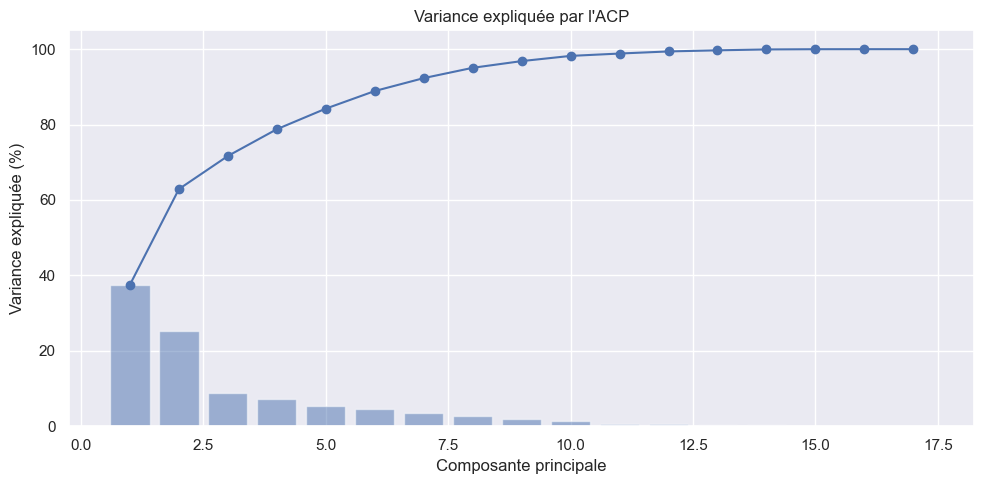

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var.cumsum() * 100, marker='o')
plt.bar(range(1, len(explained_var) + 1), explained_var * 100, alpha=0.5)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée (%)')
plt.title("Variance expliquée par l'ACP")
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
seuil = 85
nb_composantes = (df_variance["Variance cumulée (%)"] >= seuil).idxmax() + 1
print(f"Nombre de composantes nécessaires pour expliquer au moins {seuil}% de la variance : {nb_composantes}")

Nombre de composantes nécessaires pour expliquer au moins 85% de la variance : 6


In [84]:
X_pca_reduit = pd.DataFrame(X_pca[:, :nb_composantes],
                            columns=[f"PC{i+1}" for i in range(nb_composantes)])

In [85]:
X_pca_reduit["Country Name"] = df_data["Country Name"].values


In [86]:
X_pca_reduit

PC1       PC2       PC3       PC4       PC5       PC6  \
0   -1.356883 -2.443791  0.059109 -1.095333 -0.154095  0.104663   
1   -0.777777  0.175374 -0.032413 -0.366357  0.824995  0.562723   
2    0.986096  2.954216 -1.189938 -1.050267 -0.207252 -1.108820   
3    1.107494  0.891665  0.623053 -0.623149  0.626730  0.606391   
4   -0.782512 -0.290485 -0.088915 -0.021894  1.706834  0.267741   
..        ...       ...       ...       ...       ...       ...   
123 -1.364319 -0.958194  0.001834  1.891000 -0.472544  0.548190   
124 -0.997517  1.166649  0.054455  3.016494 -3.926718  4.461050   
125  1.159052 -0.436576 -0.888052 -1.401129 -0.408729 -0.219559   
126 -1.442173 -1.736181  0.055510  0.471259 -0.658229 -0.677107   
127 -1.438963 -1.982245  0.058585  0.370137 -0.504396 -0.741039   

             Country Name  
0             Afghanistan  
1                 Albania  
2    United Arab Emirates  
3               Argentina  
4                 Armenia  
..                    ...  
123               Vanuatu  
124                 Samoa  
125          South Africa  
126                Zambia  
127              Zimbabwe  

[128 rows x 7 columns]

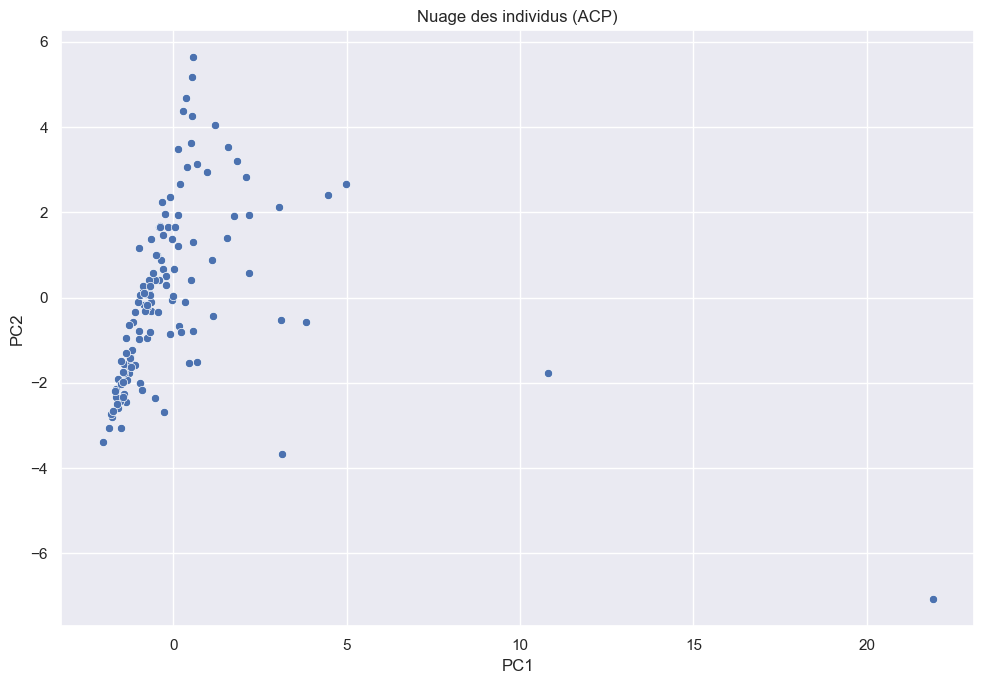

In [87]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_reduit, x="PC1", y="PC2")



plt.title("Nuage des individus (ACP)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
X_pca_reduit = X_pca_reduit.sort_values(by='PC1', ascending=False)
X_pca_reduit

PC1       PC2        PC3       PC4       PC5       PC6  \
21  21.890648 -7.074614  -4.524387  1.681844 -0.178908  0.860833   
17  10.802486 -1.758889  11.199008 -0.783824 -0.218624 -0.418038   
28   4.995649  2.670688   0.245916  0.063903 -1.560509 -1.797539   
60   4.466150  2.396978  -3.795825 -1.332625 -0.707243 -1.796922   
73   3.818769 -0.578486  -2.385785 -1.958243 -0.529619 -0.601273   
..        ...       ...        ...       ...       ...       ...   
95  -1.745738 -2.659395   0.031503  0.889067 -1.439668 -1.157261   
11  -1.776835 -2.805806   0.083453  1.125728 -0.619493 -1.333291   
81  -1.792462 -2.739871   0.096889  1.101298 -1.286845 -1.230490   
84  -1.861189 -3.049157   0.095640  0.862599 -0.949493 -1.351899   
8   -2.034063 -3.379047   0.216889 -0.259688 -2.220001 -1.474796   

        Country Name  
21             China  
17            Brazil  
28           Germany  
60             Japan  
73            Mexico  
..               ...  
95  Papua New Guinea  
11      Burkina Faso  
81            Malawi  
84             Niger  
8            Burundi  

[128 rows x 7 columns]

# découverte de mon erreur, il y a des ouliers, je les enlève et je continue mes tests

In [90]:
# 2 outliers la chine et le brésil, si on les enléve on arrive à 62% de la population mondial
df_propre = df_data[~df_data["Country Name"].isin(["China", "Brazil"])]
df_propre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 127
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Country Name                                      126 non-null    object 
 1   GDP per capita (current US$)                      126 non-null    float64
 2   GDP growth (annual %)                             126 non-null    float64
 3   GNI per capita, Atlas method (current US$         126 non-null    float64
 4   Urban population (% of total population)          126 non-null    float64
 5   Access to electricity (% of population)           126 non-null    float64
 6   Individuals using the Internet (% of population)  126 non-null    float64
 7   population                                        126 non-null    float64
 8   stabilite_politique                               126 non-null    float64
 9   Export quantity_Meat      

In [91]:
X = df_propre.drop(columns=["Country Name"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

df_variance = pd.DataFrame({
    "Composante": [f"PC{i+1}" for i in range(len(explained_var))],
    "Variance expliquée (%)": explained_var * 100,
    "Variance cumulée (%)": explained_var.cumsum() * 100
})
print(df_variance.head(10))

  Composante  Variance expliquée (%)  Variance cumulée (%)
0        PC1               36.589296             36.589296
1        PC2               22.964391             59.553687
2        PC3                8.182597             67.736284
3        PC4                7.294068             75.030351
4        PC5                5.580989             80.611341
5        PC6                5.200015             85.811355
6        PC7                4.395176             90.206531
7        PC8                2.767852             92.974383
8        PC9                2.560677             95.535060
9       PC10                1.454588             96.989649


In [92]:
import pandas as pd
from IPython.display import display
display(df_variance)

Composante  Variance expliquée (%)  Variance cumulée (%)
0         PC1               36.589296             36.589296
1         PC2               22.964391             59.553687
2         PC3                8.182597             67.736284
3         PC4                7.294068             75.030351
4         PC5                5.580989             80.611341
5         PC6                5.200015             85.811355
6         PC7                4.395176             90.206531
7         PC8                2.767852             92.974383
8         PC9                2.560677             95.535060
9        PC10                1.454588             96.989649
10       PC11                1.396308             98.385957
11       PC12                0.631108             99.017064
12       PC13                0.572504             99.589568
13       PC14                0.289970             99.879538
14       PC15                0.063931             99.943469
15       PC16                0.055238             99.998707
16       PC17                0.001293            100.000000

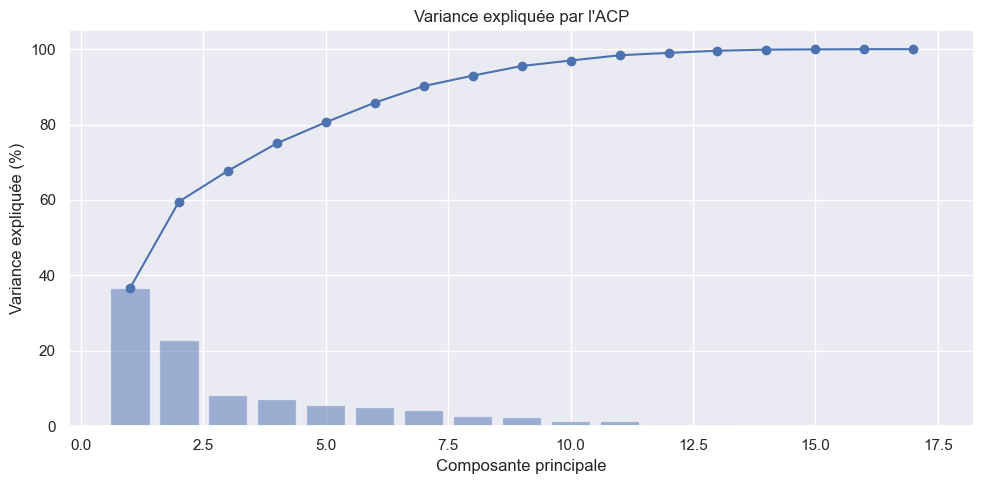

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var.cumsum() * 100, marker='o')
plt.bar(range(1, len(explained_var) + 1), explained_var * 100, alpha=0.5)
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée (%)')
plt.title("Variance expliquée par l'ACP")
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
seuil = 85
nb_composantes = (df_variance["Variance cumulée (%)"] >= seuil).idxmax() + 1
print(f"Nombre de composantes nécessaires pour expliquer au moins {seuil}% de la variance : {nb_composantes}")

Nombre de composantes nécessaires pour expliquer au moins 85% de la variance : 6


In [95]:
X_pca_reduit = pd.DataFrame(X_pca[:, :nb_composantes],
                            columns=[f"PC{i+1}" for i in range(nb_composantes)])

In [96]:
X_pca_reduit["Country Name"] = df_propre["Country Name"].values

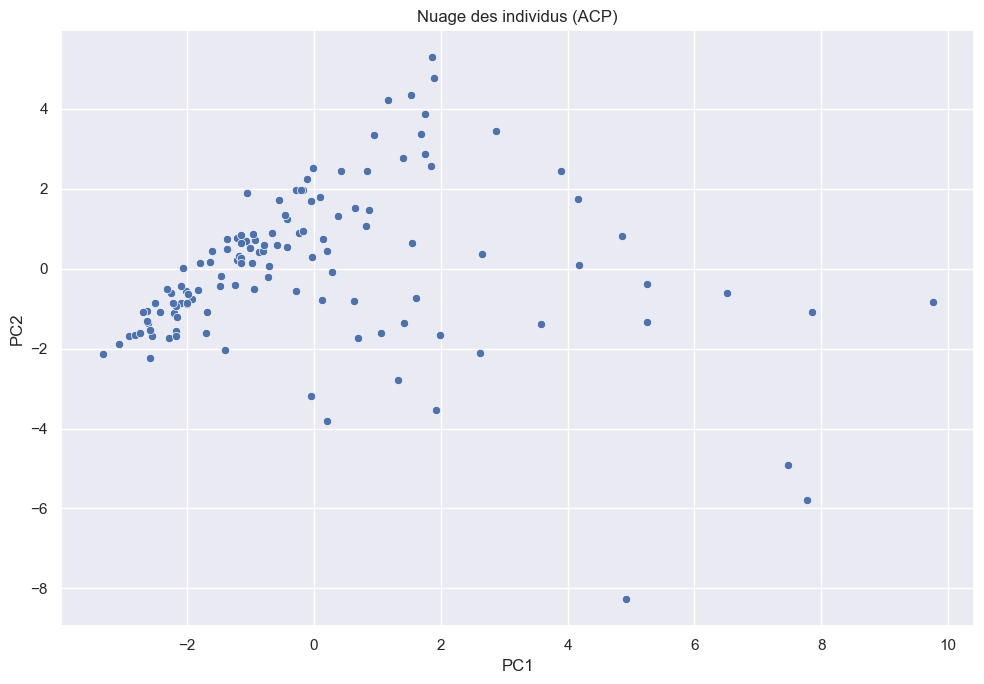

In [97]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=X_pca_reduit, x="PC1", y="PC2")

# Pour annoter uniquement certains pays 
# for i in X_pca_reduit.index:
#     if X_pca_reduit["Country Name"][i] in ["France", "Germany", "USA"]:
#         plt.text(X_pca_reduit["PC1"][i], X_pca_reduit["PC2"][i], X_pca_reduit["Country Name"][i], fontsize=8)

plt.title("Nuage des individus (ACP)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# cercle des correlations


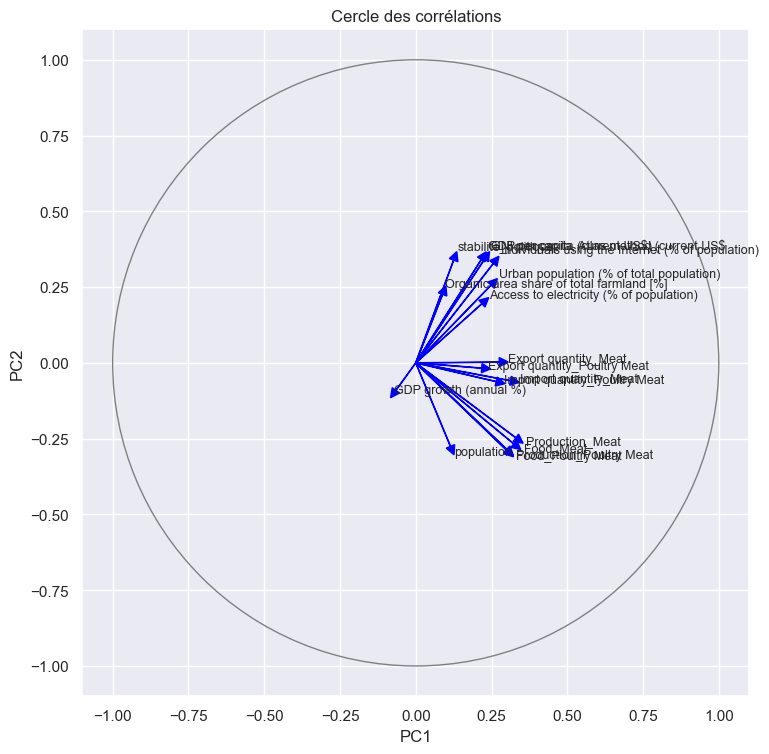

In [99]:
components = pca.components_.T  
coord_var = components[:, :2]

import matplotlib.pyplot as plt

# Création du cercle
circle = plt.Circle((0, 0), 1, color='gray', fill=False)

fig, ax = plt.subplots(figsize=(8, 8))
ax.add_artist(circle)

# Flèches pour chaque variable
for i in range(len(coord_var)):
    x, y = coord_var[i, 0], coord_var[i, 1]
    ax.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, color='blue')
    ax.text(x * 1.1, y * 1.1, X.columns[i], fontsize=9)

# Paramètres du graphique
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Cercle des corrélations")
ax.grid(True)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()


In [100]:
import plotly.graph_objects as go
import numpy as np

# Coordonnées des variables sur les 2 premières composantes
components = pca.components_.T
coord_var = components[:, :2]
var_names = X.columns.tolist()

# Création des flèches pour chaque variable
fig = go.Figure()

for i in range(len(var_names)):
    fig.add_trace(go.Scatter(
        x=[0, coord_var[i, 0]],
        y=[0, coord_var[i, 1]],
        mode="lines+text",
        line=dict(color='blue'),
        text=[None, var_names[i]],
        textposition="top center",
        name=var_names[i],
        showlegend=False
    ))

# Cercle unité
theta = np.linspace(0, 2 * np.pi, 100)
fig.add_trace(go.Scatter(
    x=np.cos(theta),
    y=np.sin(theta),
    mode='lines',
    line=dict(dash='dot', color='gray'),
    name='Cercle unité'
))

# Mise en forme
fig.update_layout(
    title="Cercle des corrélations (Plotly)",
    xaxis=dict(range=[-1.2, 1.2], title="PC1"),
    yaxis=dict(range=[-1.2, 1.2], title="PC2"),
    width=700,
    height=700,
    showlegend=False
)

fig.show()


# 2.4 matrice de correlation

In [102]:
correlation_matrix = X.corr()
pd.set_option("display.max_columns", None)  
correlation_matrix.round(2)

GDP per capita (current US$)  \
GDP per capita (current US$)                                              1.00   
GDP growth (annual %)                                                    -0.11   
GNI per capita, Atlas method (current US$                                 0.99   
Urban population (% of total population)                                  0.59   
Access to electricity (% of population)                                   0.38   
Individuals using the Internet (% of population)                          0.70   
population                                                               -0.09   
stabilite_politique                                                       0.57   
Export quantity_Meat                                                      0.38   
Export quantity_Poultry Meat                                              0.19   
Food_Meat                                                                 0.09   
Food_Poultry Meat                                                         0.03   
Import quantity_Meat                                                      0.29   
Import quantity_Poultry Meat                                              0.22   
Production_Meat                                                           0.14   
Production_Poultry Meat                                                   0.04   
Organic area share of total farmland [%]                                  0.37   

                                                  GDP growth (annual %)  \
GDP per capita (current US$)                                      -0.11   
GDP growth (annual %)                                              1.00   
GNI per capita, Atlas method (current US$                         -0.13   
Urban population (% of total population)                          -0.29   
Access to electricity (% of population)                           -0.13   
Individuals using the Internet (% of population)                  -0.21   
population                                                         0.12   
stabilite_politique                                                0.01   
Export quantity_Meat                                              -0.01   
Export quantity_Poultry Meat                                      -0.03   
Food_Meat                                                         -0.04   
Food_Poultry Meat                                                 -0.04   
Import quantity_Meat                                              -0.16   
Import quantity_Poultry Meat                                      -0.21   
Production_Meat                                                   -0.00   
Production_Poultry Meat                                            0.00   
Organic area share of total farmland [%]                          -0.11   

                                                  GNI per capita, Atlas method (current US$  \
GDP per capita (current US$)                                                           0.99   
GDP growth (annual %)                                                                 -0.13   
GNI per capita, Atlas method (current US$                                              1.00   
Urban population (% of total population)                                               0.61   
Access to electricity (% of population)                                                0.40   
Individuals using the Internet (% of population)                                       0.72   
population                                                                            -0.09   
stabilite_politique                                                                    0.57   
Export quantity_Meat                                                                   0.40   
Export quantity_Poultry Meat                                                           0.21   
Food_Meat                                                                              0.11   
Food_Poultry Meat                                                                 

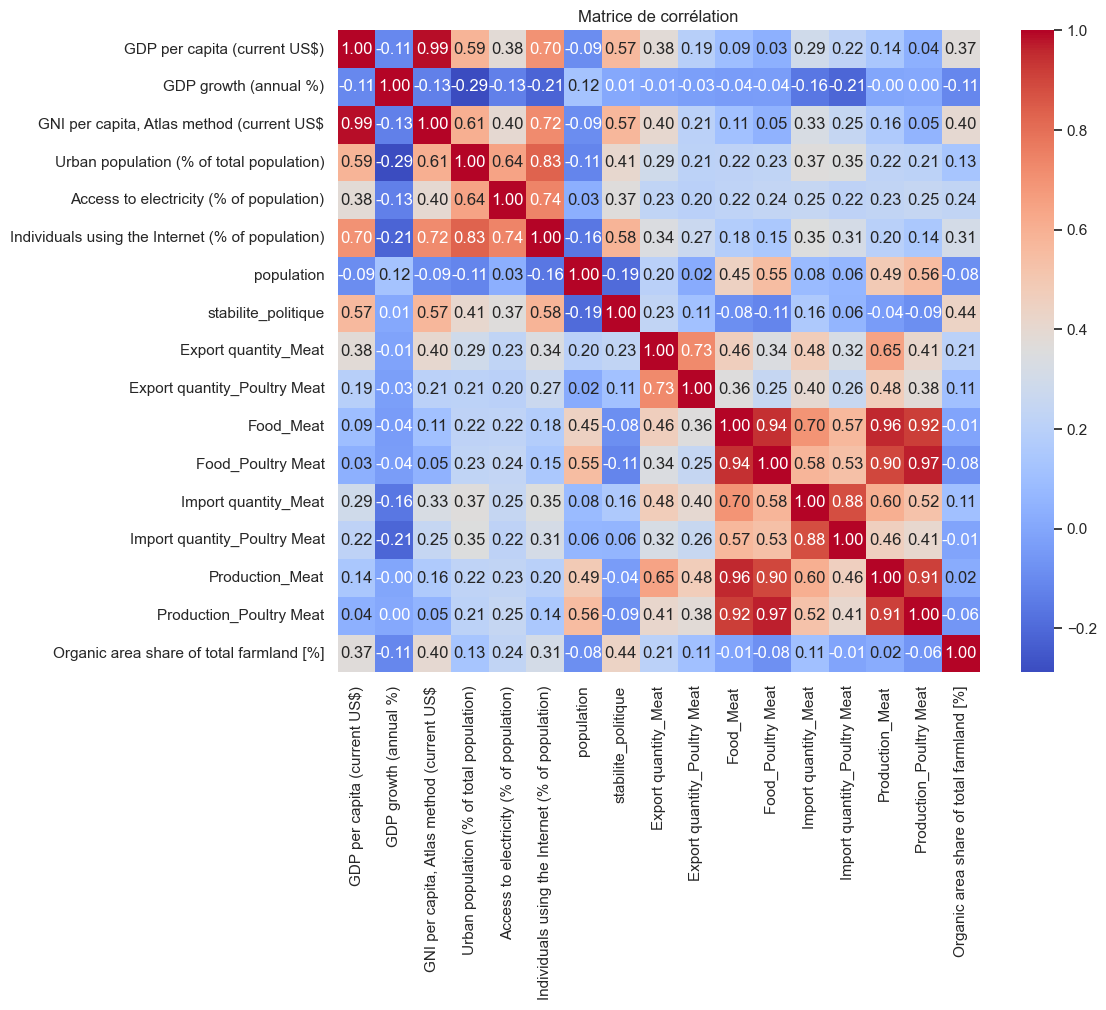

In [103]:
# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# 2.4.1 tentative 1 :  reduction nombre de variables

In [105]:
#reduire X
variables_utiles = [
    "GDP per capita (current US$)",
    "Urban population (% of total population)",
    "Access to electricity (% of population)",
    "stabilite_politique",
    "Export quantity_Meat",
    "Import quantity_Meat",
    "Production_Poultry Meat",
    "population",
    "Organic area share of total farmland [%]"
]

X_reduit = df_propre[variables_utiles].copy()


In [106]:

# Standardiser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduit)

# Appliquer l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_

df_variance = pd.DataFrame({
    "Composante": [f"PC{i+1}" for i in range(len(explained_var))],
    "Variance expliquée (%)": explained_var * 100,
    "Variance cumulée (%)": np.cumsum(explained_var) * 100
})

print(df_variance.head(10))  # Les 10 premières

  Composante  Variance expliquée (%)  Variance cumulée (%)
0        PC1               35.538294             35.538294
1        PC2               21.814100             57.352393
2        PC3               11.064002             68.416395
3        PC4                9.292719             77.709114
4        PC5                6.751793             84.460906
5        PC6                5.278866             89.739772
6        PC7                4.726834             94.466607
7        PC8                2.994450             97.461056
8        PC9                2.538944            100.000000


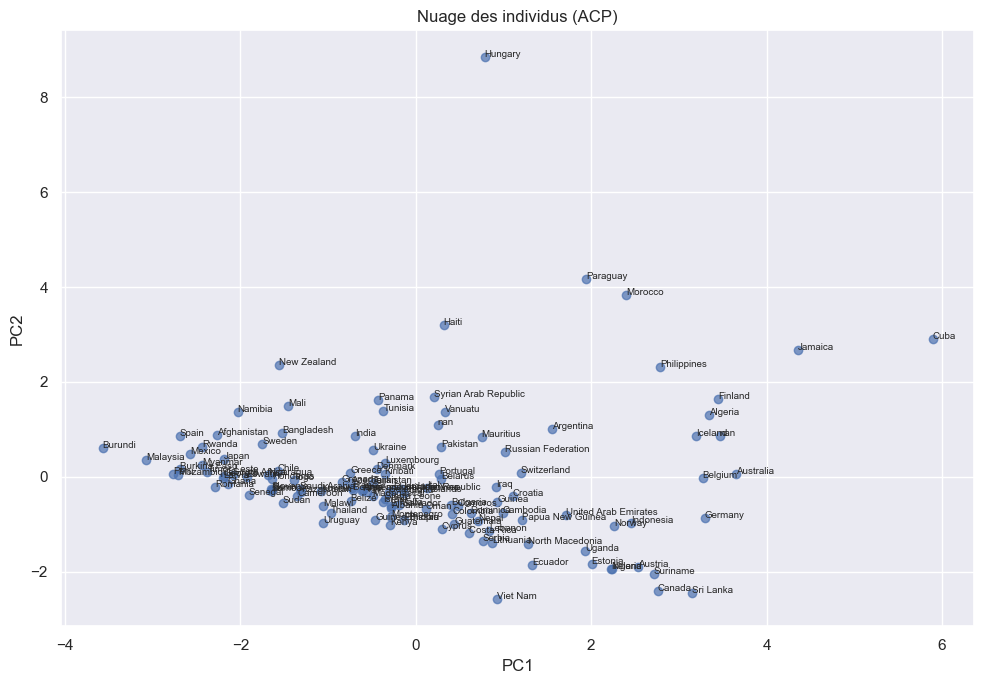

In [107]:
#Nuage des individus (avec pays)
# DataFrame avec les deux premières composantes
df_individus = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_individus["Country Name"] = df_propre["Country Name"]

# Tracer
plt.figure(figsize=(10, 7))
plt.scatter(df_individus["PC1"], df_individus["PC2"], alpha=0.7)

for i in range(df_individus.shape[0]):
    plt.text(df_individus["PC1"][i], df_individus["PC2"][i], df_individus["Country Name"][i], fontsize=7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Nuage des individus (ACP)")
plt.grid(True)
plt.tight_layout()
plt.show()

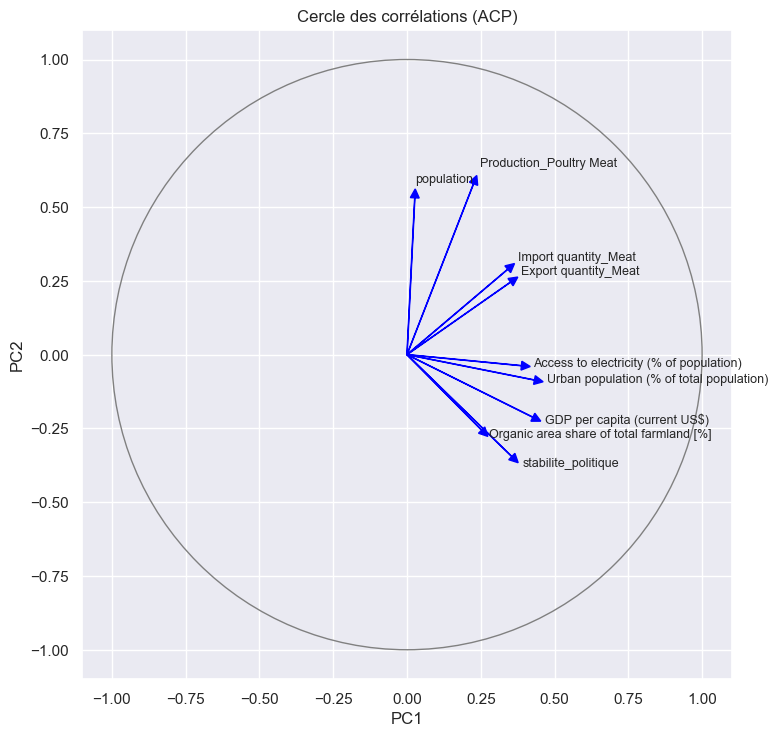

In [108]:
#cercle des correlations
# Coordonnées des variables sur les deux premiers axes
components = pca.components_.T
coord_var = components[:, :2]
var_names = X_reduit.columns

fig, ax = plt.subplots(figsize=(8, 8))

# Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Flèches des variables
for i in range(len(var_names)):
    ax.arrow(0, 0, coord_var[i, 0], coord_var[i, 1],
             head_width=0.03, head_length=0.03, color='blue')
    ax.text(coord_var[i, 0]*1.1, coord_var[i, 1]*1.1, var_names[i], fontsize=9)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Cercle des corrélations (ACP)")
ax.grid(True)
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

# 2.4.2 tentative 2 : reduction nombre de variables et feature engineering

## 3 variable en feature engineering

In [111]:
#production de volail par habitant

df_propre["prod_volaille_par_hab"] = df_propre["Production_Poultry Meat"] * 1000 / (df_propre["population"] + 1e-6)


C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\2310077549.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
#Ratio export/import viande
df_propre["ratio_export_import_viande"] = df_propre["Export quantity_Meat"] / (df_propre["Import quantity_Meat"] + 1e-6)


C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\2685235257.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [113]:
#indice numérique (accés et ussage)
df_propre["indice_numerique"] = (
    df_propre["Access to electricity (% of population)"] +
    df_propre["Individuals using the Internet (% of population)"])/ 2


C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\2634166721.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
df_propre

Country Name  GDP per capita (current US$)  \
0             Afghanistan                    525.469771   
1                 Albania                   4531.032207   
2    United Arab Emirates                  42340.591715   
3               Argentina                  14532.500931   
4                 Armenia                   3869.053739   
..                    ...                           ...   
123               Vanuatu                   3159.927161   
124                 Samoa                   4307.593820   
125          South Africa                   6618.335083   
126                Zambia                   1483.465773   
127              Zimbabwe                   3448.082537   

     GDP growth (annual %)  GNI per capita, Atlas method (current US$  \
0                 2.647003                                      530.0   
1                 3.802599                                     4290.0   
2                 0.735069                                    41390.0   
3                 2.818503                                    13070.0   
4                 7.500000                                     3900.0   
..                     ...                                        ...   
123               6.317305                                     2980.0   
124               1.406282                                     4100.0   
125               1.157947                                     5850.0   
126               3.525863                                     1260.0   
127               4.080264                                     1670.0   

     Urban population (% of total population)  \
0                                      25.250   
1                                      59.383   
2                                      86.248   
3                                      91.749   
4                                      63.103   
..                                        ...   
123                                    25.163   
124                                    18.452   
125                                    65.850   
126                                    42.976   
127                                    32.237   

     Access to electricity (% of population)  \
0                                       97.7   
1                                       99.9   
2                                      100.0   
3                                      100.0   
4                                       99.7   
..                                       ...   
123                                     62.8   
124                                     96.8   
125                                     84.4   
126                                     40.3   
127                                     44.0   

     Individuals using the Internet (% of population)  population  \
0                                                13.5  35688935.0   
1                                                62.4   2873457.0   
2                                                94.8   9223225.0   
3                                                74.3  44288894.0   
4                                                64.7   2979400.0   
..                                                ...         ...   
123                                              30.8    278507.0   
124                                              39.4    205415.0   
125                                              56.2  57635162.0   
126                                              12.2  17441320.0   
127                                              24.4  14812482.0   

     stabilite_politique  Export quantity_Meat  Export quantity_Poultry Meat  \
0              -2.794976                   0.0                           0.0   
1               0.373771                   0.0                           0.0   
2               0.601950                  77.0                          32.0   
3               0.162542                 539.0                         207.0   
4              -0.626211        

In [115]:
colonnes_finales = [
    "GDP per capita (current US$)",
    "Urban population (% of total population)",
    "stabilite_politique",
    "Export quantity_Meat",
    "Production_Poultry Meat",
    "prod_volaille_par_hab",
    "ratio_export_import_viande",
    "indice_numerique"
]

X_final = df_propre[colonnes_finales].copy()


In [116]:
X_final

GDP per capita (current US$)  Urban population (% of total population)  \
0                      525.469771                                    25.250   
1                     4531.032207                                    59.383   
2                    42340.591715                                    86.248   
3                    14532.500931                                    91.749   
4                     3869.053739                                    63.103   
..                            ...                                       ...   
123                   3159.927161                                    25.163   
124                   4307.593820                                    18.452   
125                   6618.335083                                    65.850   
126                   1483.465773                                    42.976   
127                   3448.082537                                    32.237   

     stabilite_politique  Export quantity_Meat  Production_Poultry Meat  \
0              -2.794976                   0.0                     28.0   
1               0.373771                   0.0                     13.0   
2               0.601950                  77.0                     57.0   
3               0.162542                 539.0                   2162.0   
4              -0.626211                   3.0                     11.0   
..                   ...                   ...                      ...   
123             0.676285                   0.0                      1.0   
124             1.161634                   0.0                      0.0   
125            -0.284804                 154.0                   1665.0   
126             0.142043                   1.0                     49.0   
127            -0.710431                   0.0                     69.0   

     prod_volaille_par_hab  ratio_export_import_viande  indice_numerique  
0                 0.000785                    0.000000             55.60  
1                 0.004524                    0.000000             81.15  
2                 0.006180                    0.108146             97.40  
3                 0.048816                    9.625000             87.15  
4                 0.003692                    0.058824             82.20  
..                     ...                         ...               ...  
123               0.003591                    0.000000             46.80  
124               0.000000                    0.000000             68.10  
125               0.028889                    0.267826             70.30  
126               0.002809                    0.076923             26.25  
127               0.004658                    0.000000             34.20  

[126 rows x 8 columns]

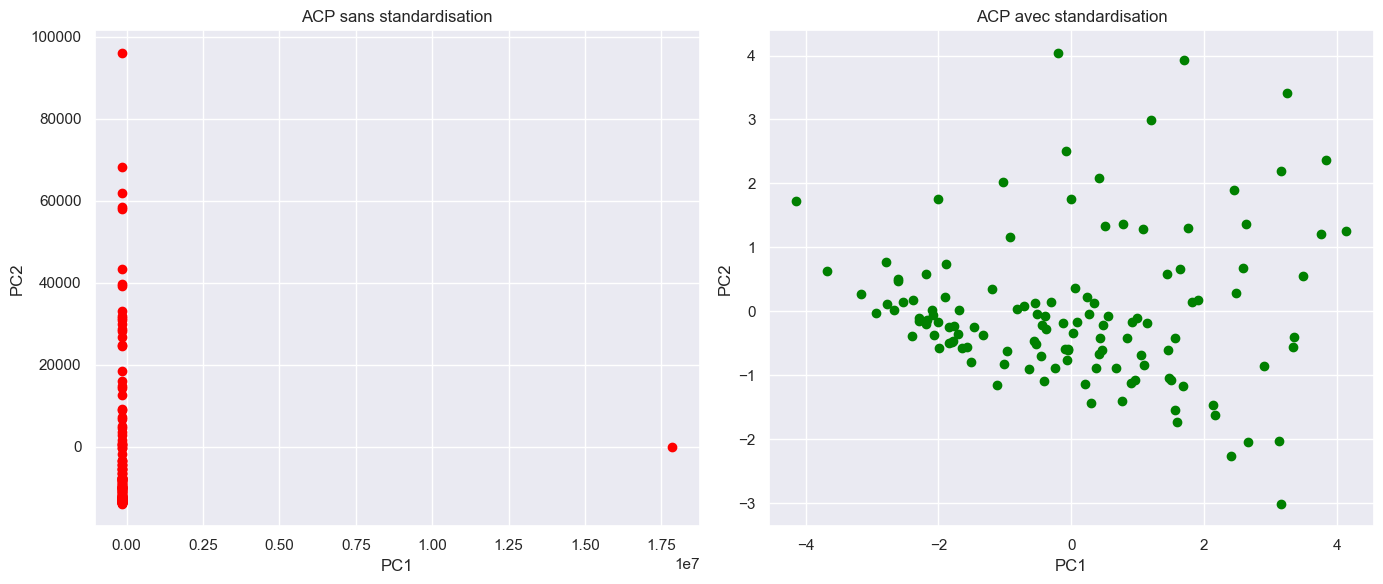

In [117]:
#test avec et sans standardisation
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# DataFrame X_final

# ------------------------------
# ACP sans standardisation
# ------------------------------
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X_final)

# ------------------------------
# ACP avec standardisation
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# ------------------------------
# Affichage des deux nuages de points
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Nuage sans standardisation
axes[0].scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], color='red')
axes[0].set_title("ACP sans standardisation")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# Nuage avec standardisation
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], color='green')
axes[1].set_title("ACP avec standardisation")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [118]:
X_final.describe()

GDP per capita (current US$)  Urban population (% of total population)  \
count                    126.000000                                126.000000   
mean                   14025.623606                                 57.855873   
std                    19889.639337                                 22.853476   
min                      236.694473                                 12.706000   
25%                     1858.873415                                 40.921250   
50%                     5806.191059                                 58.162500   
75%                    15554.096267                                 77.190000   
max                   110193.213797                                100.000000   

       stabilite_politique  Export quantity_Meat  Production_Poultry Meat  \
count           126.000000            126.000000               126.000000   
mean             -0.112998            223.825397               453.984127   
std               0.919229            573.755893               817.716127   
min              -2.794976              0.000000                 0.000000   
25%              -0.675636              0.000000                22.750000   
50%               0.009776              8.000000                98.500000   
75%               0.594100             68.250000               355.750000   
max               1.561946           3629.000000              4542.000000   

       prod_volaille_par_hab  ratio_export_import_viande  indice_numerique  
count             126.000000                1.260000e+02        126.000000  
mean                0.016768                1.428697e+05         68.743208  
std                 0.016304                1.603566e+06         25.110388  
min                 0.000000                0.000000e+00          5.980000  
25%                 0.002633                0.000000e+00         54.487500  
50%                 0.011961                1.286839e-01         77.625000  
75%                 0.026285                8.710800e-01         88.700000  
max                 0.072188                1.800000e+07         99.150000

In [119]:
#attention outliers dans ratio_export_import_viande


In [120]:


# Calcul des bornes
Q1 = df_propre["ratio_export_import_viande"].quantile(0.25)
Q3 = df_propre["ratio_export_import_viande"].quantile(0.75)
IQR = Q3 - Q1
seuil_sup = Q3 + 1.5 * IQR

# Filtrer les outliers
outliers = df_propre[df_propre["ratio_export_import_viande"] > seuil_sup]

# les pays et leurs ratios 
outliers[["Country Name", "ratio_export_import_viande"]]


Country Name  ratio_export_import_viande
3      Argentina                9.625000e+00
5      Australia                6.371711e+00
9        Belgium                2.534582e+00
15       Belarus                7.959184e+00
18        Canada                2.669388e+00
30       Denmark                3.983051e+00
34         Spain                4.098361e+00
36      Ethiopia                1.800000e+07
52         India                1.345999e+03
53       Ireland                3.837370e+00
62         Kenya                1.699998e+01
86     Nicaragua                4.200000e+00
88         Nepal                6.999993e+00
89   New Zealand                1.063441e+01
91      Pakistan                1.350000e+01
96        Poland                2.779097e+00
98      Paraguay                6.116666e+01
103        Sudan                1.499999e+01
115     Thailand                3.160000e+01
120      Ukraine                2.496183e+00
121      Uruguay                8.354839e+00

In [121]:
df_propre_sorted = df_propre.sort_values(by="ratio_export_import_viande", ascending=False)
df_propre_sorted.head(10)

Country Name  GDP per capita (current US$)  GDP growth (annual %)  \
36      Ethiopia                    745.632449               9.564190   
52         India                   1950.104683               6.795383   
98      Paraguay                   6152.267115               4.810079   
115     Thailand                   6413.091825               4.177681   
62         Kenya                   1667.484472               3.837958   
103        Sudan                    966.505676               0.709256   
91      Pakistan                   1519.234595               4.432626   
89   New Zealand                  42913.186956               3.397283   
3      Argentina                  14532.500931               2.818503   
121      Uruguay                  19184.662666               1.740376   

     GNI per capita, Atlas method (current US$  \
36                                       710.0   
52                                      1790.0   
98                                      5810.0   
115                                     5800.0   
62                                      1540.0   
103                                     1010.0   
91                                      1450.0   
89                                     38810.0   
3                                      13070.0   
121                                    16720.0   

     Urban population (% of total population)  \
36                                     20.310   
52                                     33.600   
98                                     61.300   
115                                    49.200   
62                                     26.562   
103                                    34.370   
91                                     36.442   
89                                     86.466   
3                                      91.749   
121                                    95.240   

     Access to electricity (% of population)  \
36                                      44.3   
52                                      91.8   
98                                      99.3   
115                                     99.9   
62                                      55.8   
103                                     53.0   
91                                      92.7   
89                                     100.0   
3                                      100.0   
121                                     99.8   

     Individuals using the Internet (% of population)    population  \
36                                               15.6  1.096665e+08   
52                                               18.2  1.359657e+09   
98                                               61.1  6.338660e+06   
115                                              52.9  7.116019e+07   
62                                               17.8  4.919777e+07   
103                                              18.6  4.271431e+07   
91                                               13.8  2.232740e+08   
89                                               87.7  4.813600e+06   
3                                                74.3  4.428889e+07   
121                                              70.3  3.388438e+06   

     stabilite_politique  Export quantity_Meat  Export quantity_Poultry Meat  \
36             -1.677231                  18.0                           0.0   
52             -0.774099                1346.0                           4.0   
98             -0.002855                 367.0                           4.0   
115            -0.754879                 948.0                         796.0   
62             -1.128439                  17.0                           0.0   
103            -1.971525                  15.0                           0.0   
91             -2.396912                  54.0                           4.0   
89              1.561946                 989.0                          23.0   
3               0.162542                 539.0                         207.0  

In [122]:
#il y a trop d'outliers pour les supprimer, nous allons simplement transformer le ration en logarithme
# afin d'écraser les très grande valeur sans perdre la hierarchie
df_propre["log_ratio_export_import"] = np.log1p(df_propre["ratio_export_import_viande"])  # log(1 + x)

C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\2957264713.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
df_propre.describe()

GDP per capita (current US$)  GDP growth (annual %)  \
count                    126.000000             126.000000   
mean                   14025.623606               3.517669   
std                    19889.639337               2.791162   
min                      236.694473              -6.618995   
25%                     1858.873415               1.825315   
50%                     5806.191059               3.398116   
75%                    15554.096267               5.044764   
max                   110193.213797              12.972119   

       GNI per capita, Atlas method (current US$  \
count                                 126.000000   
mean                                12966.904762   
std                                 17789.399066   
min                                   240.000000   
25%                                  1782.500000   
50%                                  5220.000000   
75%                                 14732.500000   
max                                 80770.000000   

       Urban population (% of total population)  \
count                                126.000000   
mean                                  57.855873   
std                                   22.853476   
min                                   12.706000   
25%                                   40.921250   
50%                                   58.162500   
75%                                   77.190000   
max                                  100.000000   

       Access to electricity (% of population)  \
count                               126.000000   
mean                                 84.247619   
std                                  25.927834   
min                                   9.300000   
25%                                  80.725000   
50%                                  99.350000   
75%                                 100.000000   
max                                 100.000000   

       Individuals using the Internet (% of population)    population  \
count                                        126.000000  1.260000e+02   
mean                                          53.238798  3.785783e+07   
std                                           27.869208  1.266708e+08   
min                                            2.660000  6.849600e+04   
25%                                           25.450000  4.055732e+06   
50%                                           56.650000  1.071076e+07   
75%                                           77.400000  3.123782e+07   
max                                           98.300000  1.359657e+09   

       stabilite_politique  Export quantity_Meat  \
count           126.000000            126.000000   
mean             -0.112998            223.825397   
std               0.919229            573.755893   
min              -2.794976              0.000000   
25%              -0.675636              0.000000   
50%               0.009776              8.000000   
75%               0.594100             68.250000   
max               1.561946           3629.000000   

       Export quantity_Poultry Meat     Food_Meat  Food_Poultry Meat  \
count                    126.000000    126.000000         126.000000   
mean                      50.484127   1116.912698         454.277778   
std                      150.873072   1854.614677         806.887220   
min                        0.000000      4.000000           2.000000   
25%                        0.000000    152.750000          41.250000   
50%                        1.000000    361.000000         126.500000   
75%                       17.000000    876.750000         332.250000   
max                     1025.000000  11219.000000        4634.000000   

       Import quantity_Meat  Import quantity_Poultry Meat  Production_Meat  \
count            126.000000                    126.000000       126.000000   
mean             229.325397                     85.698413      1163.079365   
std              493.800054                    183.570554 

# 2.4.3 tentative 3 : ajout log ratio import export

In [125]:
colonnes_finales = [
    "GDP per capita (current US$)",
    "Urban population (% of total population)",
    "stabilite_politique",
    "Export quantity_Meat",
    "Production_Poultry Meat",
    "prod_volaille_par_hab",
    "log_ratio_export_import",
    "indice_numerique"
]

X_final = df_propre[colonnes_finales].copy()

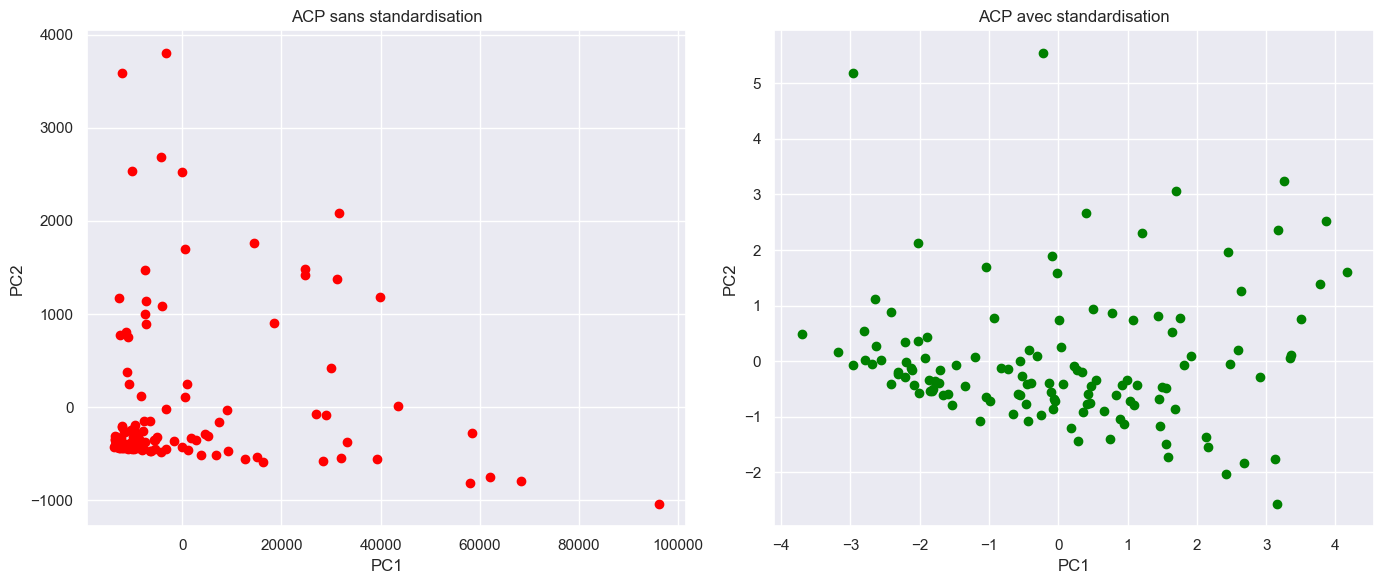

In [126]:
# DataFrame X_final

# ------------------------------
# ACP sans standardisation
# ------------------------------
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X_final)

# ------------------------------
# ACP avec standardisation
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# ------------------------------
# Affichage des deux nuages de points
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Nuage sans standardisation
axes[0].scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], color='red')
axes[0].set_title("ACP sans standardisation")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# Nuage avec standardisation
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], color='green')
axes[1].set_title("ACP avec standardisation")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [127]:
X_final.describe()

GDP per capita (current US$)  Urban population (% of total population)  \
count                    126.000000                                126.000000   
mean                   14025.623606                                 57.855873   
std                    19889.639337                                 22.853476   
min                      236.694473                                 12.706000   
25%                     1858.873415                                 40.921250   
50%                     5806.191059                                 58.162500   
75%                    15554.096267                                 77.190000   
max                   110193.213797                                100.000000   

       stabilite_politique  Export quantity_Meat  Production_Poultry Meat  \
count           126.000000            126.000000               126.000000   
mean             -0.112998            223.825397               453.984127   
std               0.919229            573.755893               817.716127   
min              -2.794976              0.000000                 0.000000   
25%              -0.675636              0.000000                22.750000   
50%               0.009776              8.000000                98.500000   
75%               0.594100             68.250000               355.750000   
max               1.561946           3629.000000              4542.000000   

       prod_volaille_par_hab  log_ratio_export_import  indice_numerique  
count             126.000000               126.000000        126.000000  
mean                0.016768                 0.660704         68.743208  
std                 0.016304                 1.754371         25.110388  
min                 0.000000                 0.000000          5.980000  
25%                 0.002633                 0.000000         54.487500  
50%                 0.011961                 0.121035         77.625000  
75%                 0.026285                 0.626510         88.700000  
max                 0.072188                16.705882         99.150000

In [128]:
#application d'un log pour PIB par habitant
df_propre["log_gdp_per_capita"] = np.log1p(df_propre["GDP per capita (current US$)"])

C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\2788823765.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 2.4.4 tentative 4 : ajout log PIB part Habitant

In [130]:
colonnes_finales = [
    "log_gdp_per_capita",
    "Urban population (% of total population)",
    "stabilite_politique",
    "Export quantity_Meat",
    "Production_Poultry Meat",
    "prod_volaille_par_hab",
    "log_ratio_export_import",
    "indice_numerique"
]

X_final = df_propre[colonnes_finales].copy()

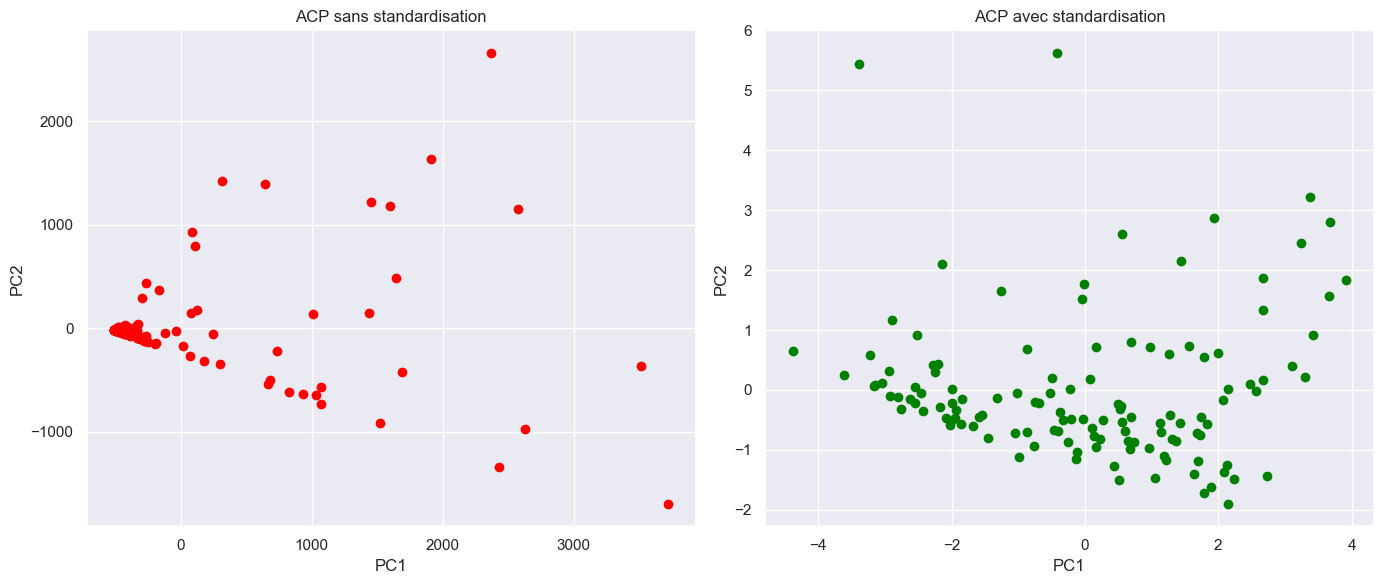

In [131]:
# ------------------------------
# ACP sans standardisation
# ------------------------------
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X_final)

# ------------------------------
# ACP avec standardisation
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# ------------------------------
# Affichage des deux nuages de points
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Nuage sans standardisation
axes[0].scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], color='red')
axes[0].set_title("ACP sans standardisation")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# Nuage avec standardisation
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], color='green')
axes[1].set_title("ACP avec standardisation")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [132]:
X_final.describe()

log_gdp_per_capita  Urban population (% of total population)  \
count          126.000000                                126.000000   
mean             8.646181                                 57.855873   
std              1.418668                                 22.853476   
min              5.470986                                 12.706000   
25%              7.528249                                 40.921250   
50%              8.666846                                 58.162500   
75%              9.652020                                 77.190000   
max             11.610000                                100.000000   

       stabilite_politique  Export quantity_Meat  Production_Poultry Meat  \
count           126.000000            126.000000               126.000000   
mean             -0.112998            223.825397               453.984127   
std               0.919229            573.755893               817.716127   
min              -2.794976              0.000000                 0.000000   
25%              -0.675636              0.000000                22.750000   
50%               0.009776              8.000000                98.500000   
75%               0.594100             68.250000               355.750000   
max               1.561946           3629.000000              4542.000000   

       prod_volaille_par_hab  log_ratio_export_import  indice_numerique  
count             126.000000               126.000000        126.000000  
mean                0.016768                 0.660704         68.743208  
std                 0.016304                 1.754371         25.110388  
min                 0.000000                 0.000000          5.980000  
25%                 0.002633                 0.000000         54.487500  
50%                 0.011961                 0.121035         77.625000  
75%                 0.026285                 0.626510         88.700000  
max                 0.072188                16.705882         99.150000

In [133]:
#application d'un log pour l'export de viande et la production de volaille
df_propre["log_export_meat"] = np.log1p(df_propre["Export quantity_Meat"])
df_propre["log_production_poultry"] = np.log1p(df_propre["Production_Poultry Meat"])

C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\3071330429.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gabry\AppData\Local\Temp\ipykernel_25792\3071330429.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# 2.4.5 tentative 5 : ajout log export viande et production volaille

In [135]:
colonnes_finales = [
    "log_gdp_per_capita",
    "Urban population (% of total population)",
    "stabilite_politique",
    "log_export_meat",
    "log_production_poultry",
    "prod_volaille_par_hab",
    "log_ratio_export_import",
    "indice_numerique"
]

X_final = df_propre[colonnes_finales].copy()

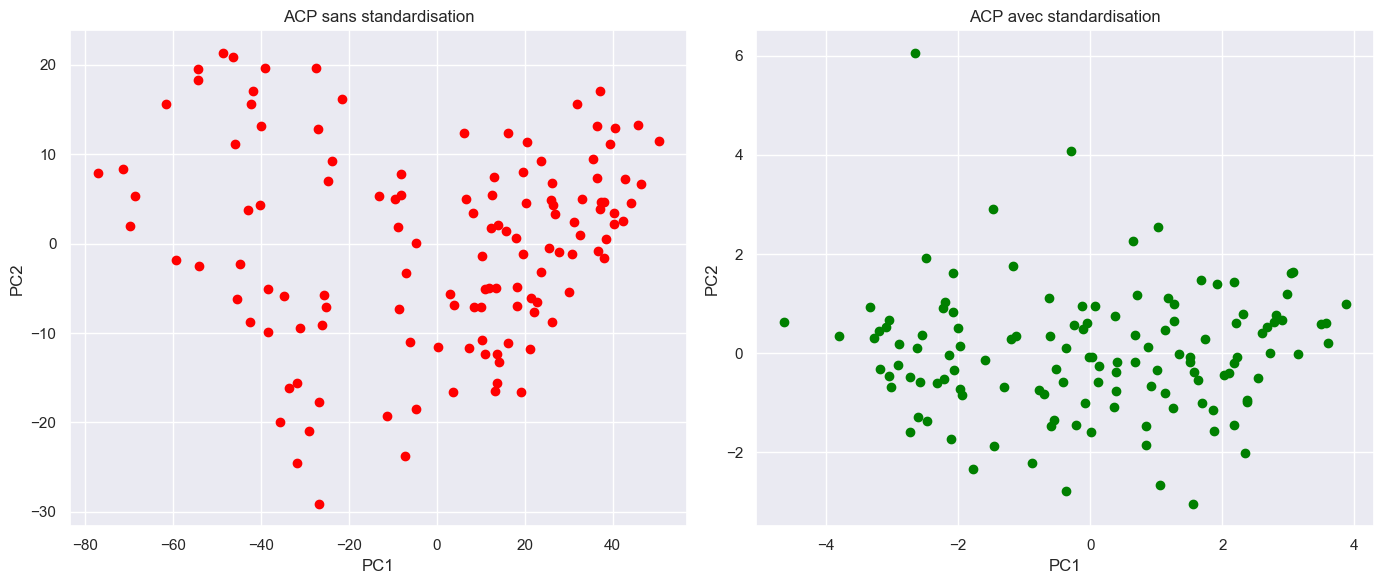

In [136]:
# ------------------------------
# ACP sans standardisation
# ------------------------------
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(X_final)

# ------------------------------
# ACP avec standardisation
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)
pca_scaled = PCA(n_components=2)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# ------------------------------
# Affichage des deux nuages de points
# ------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Nuage sans standardisation
axes[0].scatter(X_pca_raw[:, 0], X_pca_raw[:, 1], color='red')
axes[0].set_title("ACP sans standardisation")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# Nuage avec standardisation
axes[1].scatter(X_pca_scaled[:, 0], X_pca_scaled[:, 1], color='green')
axes[1].set_title("ACP avec standardisation")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [137]:
X_final.describe()


log_gdp_per_capita  Urban population (% of total population)  \
count          126.000000                                126.000000   
mean             8.646181                                 57.855873   
std              1.418668                                 22.853476   
min              5.470986                                 12.706000   
25%              7.528249                                 40.921250   
50%              8.666846                                 58.162500   
75%              9.652020                                 77.190000   
max             11.610000                                100.000000   

       stabilite_politique  log_export_meat  log_production_poultry  \
count           126.000000       126.000000              126.000000   
mean             -0.112998         2.613318                4.520609   
std               0.919229         2.484906                2.065362   
min              -2.794976         0.000000                0.000000   
25%              -0.675636         0.000000                3.166145   
50%               0.009776         2.197225                4.599842   
75%               0.594100         4.237545                5.876704   
max               1.561946         8.196988                8.421343   

       prod_volaille_par_hab  log_ratio_export_import  indice_numerique  
count             126.000000               126.000000        126.000000  
mean                0.016768                 0.660704         68.743208  
std                 0.016304                 1.754371         25.110388  
min                 0.000000                 0.000000          5.980000  
25%                 0.002633                 0.000000         54.487500  
50%                 0.011961                 0.121035         77.625000  
75%                 0.026285                 0.626510         88.700000  
max                 0.072188                16.705882         99.150000

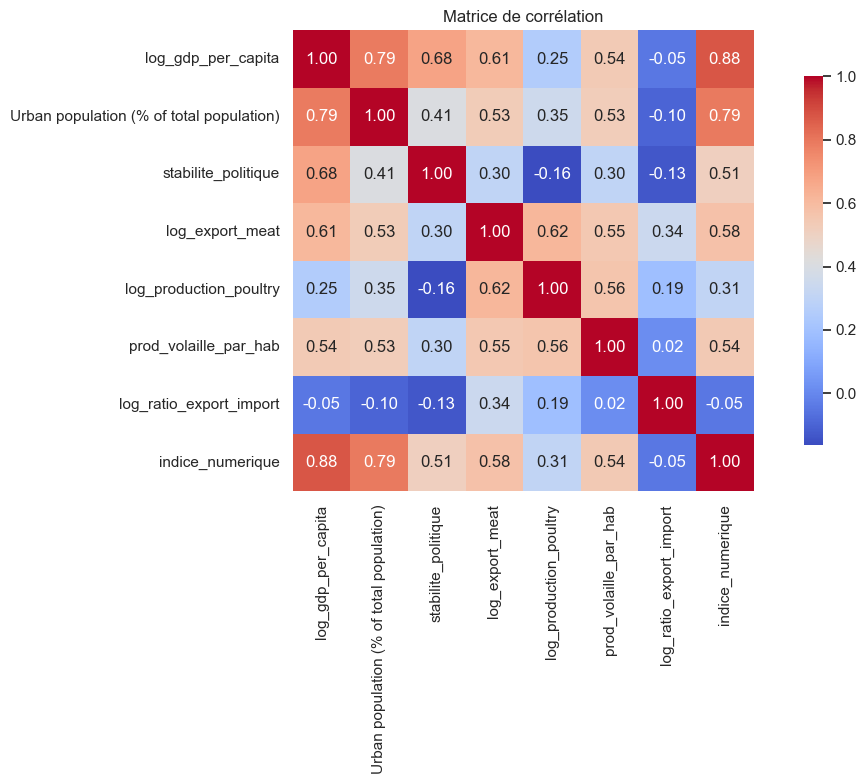

In [138]:
correlation_matrix = X_final.corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

# 3 Export du data frame

In [140]:


# Sauvegarde en CSV 
df_propre.to_csv("df_propre.csv", index=False)



